In [2]:
''' In this programs the following values are saved:
    - Lindbladian eigenvalues;
    - Time in wich the map associated to the Lindbladian we compute the eigenvalues of becomes EB
      (this time is called t_ent);
    - The eigenvlues of the map Phi(t_ent)

    See multiprocess_lindblad_save_data.py for a version of this code where parallel programming is
    implemented.
'''
import time
import numpy as np
import pandas as pd
import tenpy
import qutip
from lindblad import *
from lindblad_limit_lindbladian import *

N = 2
iterations = 20000
alpha, gamma = 1, 1
t_max = 40
t_step = 0.001
k_value = 'lim'

fixed_list = ['a']
common_path = "C:\\Users\\cerra\\Documents\\GitHub\\lindblad_data"

# Iterations on k_values. Check if alpha or gamma are fixed and compute the other value.
# The value k = 0 is taken into account when gamma is fixed, so it is possible to have alpha = 0,
# gamma = 1. In the other case, when alpha is fixed, there could be an infinity computing the gamma
# value when the value k = 0 in encountered, so in that case the algorithm passes.
t_in = time.time()
for fixed in fixed_list:
        dict_LindEigvals_tEnt = {'fixed' : fixed, 'Lind_eigvals' : [],\
                                            'Phi_tEnt_eigvals' : [], 't_ent': []}
        t_ent_list = []
        
        # For fixed k a given number (iterations) of Lindbladian matrices are constructed. For each
        # matrix, cycling on t with a fixed t_step, the negativity of entanglement is computed.
        # To achieve some informations about the dependency of t_ent from the eigenvalues of the map
        # phi(t_ent), the eigenvalues of that superoperator at that time are also saved.
        for iteration in range(iterations):
            RM_D = np.array(qutip.rand_dm_ginibre((N**2-1), rank=None))
            RM_H = tenpy.linalg.random_matrix.GUE((N,N))

            Lind_matr = Limit_Lindbladian_matrix_interact_pict(N,RM_D,RM_H,gamma)

            lind_eigvals = np.linalg.eigvals(Lind_matr)
            dict_LindEigvals_tEnt['Lind_eigvals'].append(list(lind_eigvals))

            t = 0
            while (t < t_max):
                n_ent = negat_ent(N,Lind_matr,t)
                if np.abs(np.real(n_ent)) < 1e-15:
                    print(f'iter = {iteration}, t_ent = {t}')
                    phit = phi_t(N,Lind_matr,t)
                    phit_eigvals = np.linalg.eigvals(phit)
                    dict_LindEigvals_tEnt['Phi_tEnt_eigvals'].append(list(phit_eigvals))
                    dict_LindEigvals_tEnt['t_ent'].append(t)
                    t_ent_list.append(t)
                    break

                t += t_step
        
        df_tEnt = pd.DataFrame(t_ent_list, columns = ['t_ent'])
        # print(df_tEnt)
        # Costruct a DataFrame from the dictionary where all the values have been saved.
        # df_LindEigvals_tEnt = pd.DataFrame.from_dict(dict_LindEigvals_tEnt)
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        # !!!! To prevent ValueError: The array must be all the same lenght !!!!
        try:
            df_LindEigvals_tEnt = pd.concat([pd.Series(dict_LindEigvals_tEnt[key], name = f'{key}') \
                                                for key in dict_LindEigvals_tEnt.keys()], axis = 1)
            # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
            

            # Save the DataFrame as an Excel file.
            # It will be possible to convert this file into a new DataFrame to analize data.
            writer = pd.ExcelWriter(f'{common_path}\\{fixed}_fixed_comparable_data\\Lindblad_eigvals_'\
                f't_ent_{fixed}_fixed_k_{k_value}_{iterations}_iterations_N_{N}.xlsx')
            df_LindEigvals_tEnt.to_excel(writer, 'DataFrame')
            writer.save()
            print(f'FILE CORRECTLY SAVED FOR: k = {k_value}, a = {alpha}, g = {np.round(gamma,2)}')
        except Exception as e:
            print(e)
            print(f'EXCEPTION FOUND FOR: k = {k_value}, a = {alpha}, g = {np.round(gamma,2)}')
        finally:
            writer_emergency = pd.ExcelWriter(f'{common_path}\\{fixed}_fixed_comparable_data\\Only_t_ent_Lindblad_eigvals_'\
                f't_ent_{fixed}_fixed_k_{k_value}_{iterations}_iterations_N_{N}.xlsx')
            df_tEnt.to_excel(writer_emergency, 'DataFrame')
            writer_emergency.save()
        
elapsed_time = time.time() - t_in
print(f'elapsed_time = {elapsed_time} s')
     




iter = 0, t_ent = 0.8400000000000006
iter = 1, t_ent = 0.9700000000000008
iter = 2, t_ent = 0.8530000000000006
iter = 3, t_ent = 0.8540000000000006
iter = 4, t_ent = 0.8540000000000006
iter = 5, t_ent = 0.9690000000000007
iter = 6, t_ent = 0.8320000000000006
iter = 7, t_ent = 0.9010000000000007
iter = 8, t_ent = 0.8840000000000007
iter = 9, t_ent = 0.9360000000000007
iter = 10, t_ent = 0.8430000000000006
iter = 11, t_ent = 0.8580000000000007
iter = 12, t_ent = 0.8910000000000007
iter = 13, t_ent = 0.8260000000000006
iter = 14, t_ent = 0.8290000000000006
iter = 15, t_ent = 0.8410000000000006
iter = 16, t_ent = 0.8480000000000006
iter = 17, t_ent = 0.8330000000000006
iter = 18, t_ent = 0.8770000000000007
iter = 19, t_ent = 0.8270000000000006
iter = 20, t_ent = 0.9000000000000007
iter = 21, t_ent = 0.8510000000000006
iter = 22, t_ent = 0.8540000000000006
iter = 23, t_ent = 0.8480000000000006
iter = 24, t_ent = 0.8290000000000006
iter = 25, t_ent = 0.8250000000000006
iter = 26, t_ent = 0.9

iter = 213, t_ent = 0.9190000000000007
iter = 214, t_ent = 0.9490000000000007
iter = 215, t_ent = 1.0010000000000006
iter = 216, t_ent = 0.8740000000000007
iter = 217, t_ent = 0.9520000000000007
iter = 218, t_ent = 0.8620000000000007
iter = 219, t_ent = 0.8480000000000006
iter = 220, t_ent = 0.8290000000000006
iter = 221, t_ent = 0.8850000000000007
iter = 222, t_ent = 1.1169999999999878
iter = 223, t_ent = 1.033999999999997
iter = 224, t_ent = 0.8370000000000006
iter = 225, t_ent = 0.8470000000000006
iter = 226, t_ent = 0.8620000000000007
iter = 227, t_ent = 0.8510000000000006
iter = 228, t_ent = 0.8330000000000006
iter = 229, t_ent = 0.9260000000000007
iter = 230, t_ent = 0.8440000000000006
iter = 231, t_ent = 0.8550000000000006
iter = 232, t_ent = 0.8790000000000007
iter = 233, t_ent = 0.8490000000000006
iter = 234, t_ent = 0.8320000000000006
iter = 235, t_ent = 0.8260000000000006
iter = 236, t_ent = 0.8980000000000007
iter = 237, t_ent = 0.8310000000000006
iter = 238, t_ent = 0.8980

iter = 424, t_ent = 0.8290000000000006
iter = 425, t_ent = 0.8310000000000006
iter = 426, t_ent = 1.0219999999999982
iter = 427, t_ent = 0.8300000000000006
iter = 428, t_ent = 1.1319999999999861
iter = 429, t_ent = 0.8380000000000006
iter = 430, t_ent = 0.9560000000000007
iter = 431, t_ent = 0.8240000000000006
iter = 432, t_ent = 0.8430000000000006
iter = 433, t_ent = 0.8540000000000006
iter = 434, t_ent = 0.8690000000000007
iter = 435, t_ent = 0.8340000000000006
iter = 436, t_ent = 0.9070000000000007
iter = 437, t_ent = 0.8420000000000006
iter = 438, t_ent = 0.8370000000000006
iter = 439, t_ent = 0.8390000000000006
iter = 440, t_ent = 0.8340000000000006
iter = 441, t_ent = 0.8970000000000007
iter = 442, t_ent = 1.0819999999999916
iter = 443, t_ent = 0.8550000000000006
iter = 444, t_ent = 0.8750000000000007
iter = 445, t_ent = 0.8770000000000007
iter = 446, t_ent = 0.8410000000000006
iter = 447, t_ent = 0.9220000000000007
iter = 448, t_ent = 0.8260000000000006
iter = 449, t_ent = 1.006

iter = 635, t_ent = 0.8480000000000006
iter = 636, t_ent = 0.8530000000000006
iter = 637, t_ent = 0.8590000000000007
iter = 638, t_ent = 1.0439999999999958
iter = 639, t_ent = 0.9400000000000007
iter = 640, t_ent = 0.8330000000000006
iter = 641, t_ent = 0.9240000000000007
iter = 642, t_ent = 0.8880000000000007
iter = 643, t_ent = 0.9670000000000007
iter = 644, t_ent = 0.9420000000000007
iter = 645, t_ent = 0.8600000000000007
iter = 646, t_ent = 0.8840000000000007
iter = 647, t_ent = 0.8550000000000006
iter = 648, t_ent = 0.9040000000000007
iter = 649, t_ent = 0.8660000000000007
iter = 650, t_ent = 0.9420000000000007
iter = 651, t_ent = 0.8330000000000006
iter = 652, t_ent = 0.8490000000000006
iter = 653, t_ent = 0.8500000000000006
iter = 654, t_ent = 0.8470000000000006
iter = 655, t_ent = 0.9010000000000007
iter = 656, t_ent = 0.9630000000000007
iter = 657, t_ent = 0.8720000000000007
iter = 658, t_ent = 0.8920000000000007
iter = 659, t_ent = 0.8250000000000006
iter = 660, t_ent = 0.844

iter = 846, t_ent = 0.8430000000000006
iter = 847, t_ent = 0.8380000000000006
iter = 848, t_ent = 0.9440000000000007
iter = 849, t_ent = 0.8440000000000006
iter = 850, t_ent = 0.8370000000000006
iter = 851, t_ent = 0.9360000000000007
iter = 852, t_ent = 0.8760000000000007
iter = 853, t_ent = 0.9100000000000007
iter = 854, t_ent = 0.8630000000000007
iter = 855, t_ent = 1.007
iter = 856, t_ent = 0.8330000000000006
iter = 857, t_ent = 0.8250000000000006
iter = 858, t_ent = 0.8680000000000007
iter = 859, t_ent = 0.8410000000000006
iter = 860, t_ent = 0.8530000000000006
iter = 861, t_ent = 0.9820000000000008
iter = 862, t_ent = 0.9500000000000007
iter = 863, t_ent = 0.8420000000000006
iter = 864, t_ent = 0.8540000000000006
iter = 865, t_ent = 0.8440000000000006
iter = 866, t_ent = 0.8750000000000007
iter = 867, t_ent = 0.8450000000000006
iter = 868, t_ent = 0.8560000000000006
iter = 869, t_ent = 0.8930000000000007
iter = 870, t_ent = 0.8340000000000006
iter = 871, t_ent = 0.9450000000000007

iter = 1056, t_ent = 0.8520000000000006
iter = 1057, t_ent = 0.8320000000000006
iter = 1058, t_ent = 0.8530000000000006
iter = 1059, t_ent = 0.8480000000000006
iter = 1060, t_ent = 0.8790000000000007
iter = 1061, t_ent = 0.8470000000000006
iter = 1062, t_ent = 0.8430000000000006
iter = 1063, t_ent = 0.8940000000000007
iter = 1064, t_ent = 0.9660000000000007
iter = 1065, t_ent = 0.8570000000000007
iter = 1066, t_ent = 0.9130000000000007
iter = 1067, t_ent = 0.8880000000000007
iter = 1068, t_ent = 0.8970000000000007
iter = 1069, t_ent = 0.8760000000000007
iter = 1070, t_ent = 0.9020000000000007
iter = 1071, t_ent = 0.8810000000000007
iter = 1072, t_ent = 0.8350000000000006
iter = 1073, t_ent = 0.8440000000000006
iter = 1074, t_ent = 0.8830000000000007
iter = 1075, t_ent = 0.8450000000000006
iter = 1076, t_ent = 0.8270000000000006
iter = 1077, t_ent = 0.8710000000000007
iter = 1078, t_ent = 0.8680000000000007
iter = 1079, t_ent = 0.8580000000000007
iter = 1080, t_ent = 0.8970000000000007


iter = 1261, t_ent = 0.8460000000000006
iter = 1262, t_ent = 0.8550000000000006
iter = 1263, t_ent = 0.9030000000000007
iter = 1264, t_ent = 0.8610000000000007
iter = 1265, t_ent = 1.0129999999999992
iter = 1266, t_ent = 0.8390000000000006
iter = 1267, t_ent = 0.8280000000000006
iter = 1268, t_ent = 0.8400000000000006
iter = 1269, t_ent = 0.8870000000000007
iter = 1270, t_ent = 0.9100000000000007
iter = 1271, t_ent = 0.8470000000000006
iter = 1272, t_ent = 0.8310000000000006
iter = 1273, t_ent = 0.8780000000000007
iter = 1274, t_ent = 0.8590000000000007
iter = 1275, t_ent = 0.8860000000000007
iter = 1276, t_ent = 0.9010000000000007
iter = 1277, t_ent = 0.8250000000000006
iter = 1278, t_ent = 0.8540000000000006
iter = 1279, t_ent = 0.8570000000000007
iter = 1280, t_ent = 0.8880000000000007
iter = 1281, t_ent = 0.9020000000000007
iter = 1282, t_ent = 0.9090000000000007
iter = 1283, t_ent = 0.8360000000000006
iter = 1284, t_ent = 0.9920000000000008
iter = 1285, t_ent = 0.8400000000000006


iter = 1467, t_ent = 0.8280000000000006
iter = 1468, t_ent = 1.1069999999999889
iter = 1469, t_ent = 0.9330000000000007
iter = 1470, t_ent = 0.8390000000000006
iter = 1471, t_ent = 0.9270000000000007
iter = 1472, t_ent = 0.8350000000000006
iter = 1473, t_ent = 0.8750000000000007
iter = 1474, t_ent = 0.8490000000000006
iter = 1475, t_ent = 0.8250000000000006
iter = 1476, t_ent = 0.8520000000000006
iter = 1477, t_ent = 0.9100000000000007
iter = 1478, t_ent = 0.8300000000000006
iter = 1479, t_ent = 0.8670000000000007
iter = 1480, t_ent = 0.8460000000000006
iter = 1481, t_ent = 0.8860000000000007
iter = 1482, t_ent = 0.8500000000000006
iter = 1483, t_ent = 0.8310000000000006
iter = 1484, t_ent = 0.8950000000000007
iter = 1485, t_ent = 0.9090000000000007
iter = 1486, t_ent = 0.8520000000000006
iter = 1487, t_ent = 0.8500000000000006
iter = 1488, t_ent = 0.8560000000000006
iter = 1489, t_ent = 0.9110000000000007
iter = 1490, t_ent = 0.9220000000000007
iter = 1491, t_ent = 1.387999999999958
i

iter = 1672, t_ent = 0.9670000000000007
iter = 1673, t_ent = 0.8310000000000006
iter = 1674, t_ent = 0.8990000000000007
iter = 1675, t_ent = 0.9110000000000007
iter = 1676, t_ent = 0.9210000000000007
iter = 1677, t_ent = 0.8400000000000006
iter = 1678, t_ent = 1.1279999999999866
iter = 1679, t_ent = 0.9790000000000008
iter = 1680, t_ent = 0.8470000000000006
iter = 1681, t_ent = 0.8340000000000006
iter = 1682, t_ent = 0.8570000000000007
iter = 1683, t_ent = 0.8700000000000007
iter = 1684, t_ent = 0.8520000000000006
iter = 1685, t_ent = 0.9410000000000007
iter = 1686, t_ent = 1.1679999999999822
iter = 1687, t_ent = 0.8480000000000006
iter = 1688, t_ent = 0.8580000000000007
iter = 1689, t_ent = 0.8830000000000007
iter = 1690, t_ent = 0.9040000000000007
iter = 1691, t_ent = 0.8800000000000007
iter = 1692, t_ent = 0.8370000000000006
iter = 1693, t_ent = 0.8730000000000007
iter = 1694, t_ent = 0.8530000000000006
iter = 1695, t_ent = 0.8370000000000006
iter = 1696, t_ent = 0.8250000000000006


iter = 1877, t_ent = 0.8690000000000007
iter = 1878, t_ent = 1.0209999999999984
iter = 1879, t_ent = 0.8640000000000007
iter = 1880, t_ent = 0.9020000000000007
iter = 1881, t_ent = 0.8550000000000006
iter = 1882, t_ent = 0.9540000000000007
iter = 1883, t_ent = 0.8700000000000007
iter = 1884, t_ent = 0.8490000000000006
iter = 1885, t_ent = 0.8340000000000006
iter = 1886, t_ent = 0.8590000000000007
iter = 1887, t_ent = 0.9160000000000007
iter = 1888, t_ent = 0.8270000000000006
iter = 1889, t_ent = 0.8480000000000006
iter = 1890, t_ent = 0.8870000000000007
iter = 1891, t_ent = 0.9130000000000007
iter = 1892, t_ent = 0.8350000000000006
iter = 1893, t_ent = 0.8570000000000007
iter = 1894, t_ent = 0.8550000000000006
iter = 1895, t_ent = 0.8680000000000007
iter = 1896, t_ent = 0.8450000000000006
iter = 1897, t_ent = 0.8260000000000006
iter = 1898, t_ent = 0.8400000000000006
iter = 1899, t_ent = 0.8890000000000007
iter = 1900, t_ent = 0.8650000000000007
iter = 1901, t_ent = 0.9430000000000007


iter = 2082, t_ent = 0.8660000000000007
iter = 2083, t_ent = 0.9010000000000007
iter = 2084, t_ent = 0.8540000000000006
iter = 2085, t_ent = 0.8440000000000006
iter = 2086, t_ent = 1.086999999999991
iter = 2087, t_ent = 0.8340000000000006
iter = 2088, t_ent = 0.8330000000000006
iter = 2089, t_ent = 0.8740000000000007
iter = 2090, t_ent = 0.8540000000000006
iter = 2091, t_ent = 0.8780000000000007
iter = 2092, t_ent = 0.8500000000000006
iter = 2093, t_ent = 0.8930000000000007
iter = 2094, t_ent = 0.8560000000000006
iter = 2095, t_ent = 1.0559999999999945
iter = 2096, t_ent = 0.8360000000000006
iter = 2097, t_ent = 0.8500000000000006
iter = 2098, t_ent = 0.8880000000000007
iter = 2099, t_ent = 0.8990000000000007
iter = 2100, t_ent = 0.9970000000000008
iter = 2101, t_ent = 0.8320000000000006
iter = 2102, t_ent = 0.8340000000000006
iter = 2103, t_ent = 0.8370000000000006
iter = 2104, t_ent = 0.8270000000000006
iter = 2105, t_ent = 0.9010000000000007
iter = 2106, t_ent = 0.8270000000000006
i

iter = 2287, t_ent = 0.8750000000000007
iter = 2288, t_ent = 1.0129999999999992
iter = 2289, t_ent = 1.0409999999999962
iter = 2290, t_ent = 0.8310000000000006
iter = 2291, t_ent = 0.9300000000000007
iter = 2292, t_ent = 0.8470000000000006
iter = 2293, t_ent = 0.8620000000000007
iter = 2294, t_ent = 0.9590000000000007
iter = 2295, t_ent = 0.8690000000000007
iter = 2296, t_ent = 0.8320000000000006
iter = 2297, t_ent = 0.9880000000000008
iter = 2298, t_ent = 0.9230000000000007
iter = 2299, t_ent = 1.0469999999999955
iter = 2300, t_ent = 1.0719999999999927
iter = 2301, t_ent = 0.8670000000000007
iter = 2302, t_ent = 0.8460000000000006
iter = 2303, t_ent = 0.8320000000000006
iter = 2304, t_ent = 0.8410000000000006
iter = 2305, t_ent = 1.2259999999999758
iter = 2306, t_ent = 0.8520000000000006
iter = 2307, t_ent = 0.8520000000000006
iter = 2308, t_ent = 0.8640000000000007
iter = 2309, t_ent = 0.9230000000000007
iter = 2310, t_ent = 0.8730000000000007
iter = 2311, t_ent = 0.9410000000000007


iter = 2492, t_ent = 0.8300000000000006
iter = 2493, t_ent = 0.8330000000000006
iter = 2494, t_ent = 0.9130000000000007
iter = 2495, t_ent = 0.9020000000000007
iter = 2496, t_ent = 0.9480000000000007
iter = 2497, t_ent = 0.8430000000000006
iter = 2498, t_ent = 0.9010000000000007
iter = 2499, t_ent = 0.8300000000000006
iter = 2500, t_ent = 0.8710000000000007
iter = 2501, t_ent = 0.8310000000000006
iter = 2502, t_ent = 0.8300000000000006
iter = 2503, t_ent = 0.9640000000000007
iter = 2504, t_ent = 0.8740000000000007
iter = 2505, t_ent = 0.8440000000000006
iter = 2506, t_ent = 0.8660000000000007
iter = 2507, t_ent = 0.8400000000000006
iter = 2508, t_ent = 0.8500000000000006
iter = 2509, t_ent = 0.8260000000000006
iter = 2510, t_ent = 0.8870000000000007
iter = 2511, t_ent = 0.8860000000000007
iter = 2512, t_ent = 0.8330000000000006
iter = 2513, t_ent = 0.8370000000000006
iter = 2514, t_ent = 0.8520000000000006
iter = 2515, t_ent = 0.8260000000000006
iter = 2516, t_ent = 0.8270000000000006


iter = 2697, t_ent = 0.9590000000000007
iter = 2698, t_ent = 0.8400000000000006
iter = 2699, t_ent = 0.8760000000000007
iter = 2700, t_ent = 1.1209999999999873
iter = 2701, t_ent = 0.8750000000000007
iter = 2702, t_ent = 0.8370000000000006
iter = 2703, t_ent = 0.8550000000000006
iter = 2704, t_ent = 0.8390000000000006
iter = 2705, t_ent = 0.8660000000000007
iter = 2706, t_ent = 0.9190000000000007
iter = 2707, t_ent = 0.8330000000000006
iter = 2708, t_ent = 0.9750000000000008
iter = 2709, t_ent = 0.8580000000000007
iter = 2710, t_ent = 0.9690000000000007
iter = 2711, t_ent = 0.8320000000000006
iter = 2712, t_ent = 0.8460000000000006
iter = 2713, t_ent = 0.9030000000000007
iter = 2714, t_ent = 0.8280000000000006
iter = 2715, t_ent = 1.059999999999994
iter = 2716, t_ent = 0.8630000000000007
iter = 2717, t_ent = 0.9840000000000008
iter = 2718, t_ent = 0.8520000000000006
iter = 2719, t_ent = 0.9820000000000008
iter = 2720, t_ent = 0.8450000000000006
iter = 2721, t_ent = 0.8400000000000006
i

iter = 2902, t_ent = 0.8620000000000007
iter = 2903, t_ent = 0.9210000000000007
iter = 2904, t_ent = 0.8730000000000007
iter = 2905, t_ent = 0.8930000000000007
iter = 2906, t_ent = 0.8930000000000007
iter = 2907, t_ent = 1.0749999999999924
iter = 2908, t_ent = 0.8580000000000007
iter = 2909, t_ent = 0.8300000000000006
iter = 2910, t_ent = 0.8290000000000006
iter = 2911, t_ent = 0.8760000000000007
iter = 2912, t_ent = 0.8280000000000006
iter = 2913, t_ent = 1.0089999999999997
iter = 2914, t_ent = 0.8730000000000007
iter = 2915, t_ent = 0.8310000000000006
iter = 2916, t_ent = 0.8570000000000007
iter = 2917, t_ent = 0.9880000000000008
iter = 2918, t_ent = 0.8690000000000007
iter = 2919, t_ent = 0.8340000000000006
iter = 2920, t_ent = 0.8390000000000006
iter = 2921, t_ent = 0.8260000000000006
iter = 2922, t_ent = 0.8240000000000006
iter = 2923, t_ent = 0.8440000000000006
iter = 2924, t_ent = 0.8410000000000006
iter = 2925, t_ent = 1.0589999999999942
iter = 2926, t_ent = 0.9920000000000008


iter = 3108, t_ent = 0.9080000000000007
iter = 3109, t_ent = 0.9470000000000007
iter = 3110, t_ent = 0.8590000000000007
iter = 3111, t_ent = 0.8280000000000006
iter = 3112, t_ent = 0.9260000000000007
iter = 3113, t_ent = 0.9310000000000007
iter = 3114, t_ent = 0.8330000000000006
iter = 3115, t_ent = 0.8500000000000006
iter = 3116, t_ent = 0.8800000000000007
iter = 3117, t_ent = 0.8420000000000006
iter = 3118, t_ent = 0.8260000000000006
iter = 3119, t_ent = 0.8710000000000007
iter = 3120, t_ent = 0.8680000000000007
iter = 3121, t_ent = 0.9000000000000007
iter = 3122, t_ent = 0.8980000000000007
iter = 3123, t_ent = 0.8260000000000006
iter = 3124, t_ent = 0.8730000000000007
iter = 3125, t_ent = 0.8470000000000006
iter = 3126, t_ent = 0.8400000000000006
iter = 3127, t_ent = 0.8310000000000006
iter = 3128, t_ent = 0.8840000000000007
iter = 3129, t_ent = 0.8500000000000006
iter = 3130, t_ent = 0.8570000000000007
iter = 3131, t_ent = 0.9380000000000007
iter = 3132, t_ent = 0.8900000000000007


iter = 3313, t_ent = 0.9910000000000008
iter = 3314, t_ent = 0.8380000000000006
iter = 3315, t_ent = 0.8450000000000006
iter = 3316, t_ent = 0.8630000000000007
iter = 3317, t_ent = 0.8530000000000006
iter = 3318, t_ent = 0.8640000000000007
iter = 3319, t_ent = 0.8400000000000006
iter = 3320, t_ent = 0.8330000000000006
iter = 3321, t_ent = 0.8920000000000007
iter = 3322, t_ent = 0.8560000000000006
iter = 3323, t_ent = 0.9460000000000007
iter = 3324, t_ent = 0.9580000000000007
iter = 3325, t_ent = 0.8370000000000006
iter = 3326, t_ent = 1.0949999999999902
iter = 3327, t_ent = 0.8610000000000007
iter = 3328, t_ent = 0.8380000000000006
iter = 3329, t_ent = 0.9030000000000007
iter = 3330, t_ent = 0.8250000000000006
iter = 3331, t_ent = 0.8730000000000007
iter = 3332, t_ent = 0.8290000000000006
iter = 3333, t_ent = 0.8450000000000006
iter = 3334, t_ent = 0.8950000000000007
iter = 3335, t_ent = 0.8820000000000007
iter = 3336, t_ent = 0.9890000000000008
iter = 3337, t_ent = 0.8590000000000007


iter = 3518, t_ent = 0.8840000000000007
iter = 3519, t_ent = 0.8420000000000006
iter = 3520, t_ent = 0.8440000000000006
iter = 3521, t_ent = 0.8550000000000006
iter = 3522, t_ent = 0.8260000000000006
iter = 3523, t_ent = 0.9300000000000007
iter = 3524, t_ent = 0.8530000000000006
iter = 3525, t_ent = 0.8270000000000006
iter = 3526, t_ent = 0.8820000000000007
iter = 3527, t_ent = 1.104999999999989
iter = 3528, t_ent = 0.8620000000000007
iter = 3529, t_ent = 0.8310000000000006
iter = 3530, t_ent = 0.8380000000000006
iter = 3531, t_ent = 0.8520000000000006
iter = 3532, t_ent = 0.8440000000000006
iter = 3533, t_ent = 0.8610000000000007
iter = 3534, t_ent = 0.8420000000000006
iter = 3535, t_ent = 0.8330000000000006
iter = 3536, t_ent = 0.8290000000000006
iter = 3537, t_ent = 0.9340000000000007
iter = 3538, t_ent = 0.8830000000000007
iter = 3539, t_ent = 0.8320000000000006
iter = 3540, t_ent = 0.8330000000000006
iter = 3541, t_ent = 0.8350000000000006
iter = 3542, t_ent = 0.8270000000000006
i

iter = 3723, t_ent = 1.151999999999984
iter = 3724, t_ent = 1.1479999999999844
iter = 3725, t_ent = 0.8840000000000007
iter = 3726, t_ent = 0.8650000000000007
iter = 3727, t_ent = 0.8330000000000006
iter = 3728, t_ent = 0.9430000000000007
iter = 3729, t_ent = 0.8260000000000006
iter = 3730, t_ent = 0.8280000000000006
iter = 3731, t_ent = 0.9260000000000007
iter = 3732, t_ent = 1.160999999999983
iter = 3733, t_ent = 0.8370000000000006
iter = 3734, t_ent = 0.8990000000000007
iter = 3735, t_ent = 0.8610000000000007
iter = 3736, t_ent = 0.8250000000000006
iter = 3737, t_ent = 0.8320000000000006
iter = 3738, t_ent = 0.8440000000000006
iter = 3739, t_ent = 0.9390000000000007
iter = 3740, t_ent = 0.8650000000000007
iter = 3741, t_ent = 0.8250000000000006
iter = 3742, t_ent = 1.0369999999999966
iter = 3743, t_ent = 0.8400000000000006
iter = 3744, t_ent = 0.8270000000000006
iter = 3745, t_ent = 0.8890000000000007
iter = 3746, t_ent = 0.9150000000000007
iter = 3747, t_ent = 0.8360000000000006
it

iter = 3928, t_ent = 0.8650000000000007
iter = 3929, t_ent = 0.8920000000000007
iter = 3930, t_ent = 1.1169999999999878
iter = 3931, t_ent = 0.8540000000000006
iter = 3932, t_ent = 0.8450000000000006
iter = 3933, t_ent = 0.8460000000000006
iter = 3934, t_ent = 0.9220000000000007
iter = 3935, t_ent = 0.8940000000000007
iter = 3936, t_ent = 1.1269999999999867
iter = 3937, t_ent = 0.9250000000000007
iter = 3938, t_ent = 0.9110000000000007
iter = 3939, t_ent = 1.1119999999999883
iter = 3940, t_ent = 0.8510000000000006
iter = 3941, t_ent = 0.8940000000000007
iter = 3942, t_ent = 0.8300000000000006
iter = 3943, t_ent = 0.8640000000000007
iter = 3944, t_ent = 0.8320000000000006
iter = 3945, t_ent = 1.0929999999999904
iter = 3946, t_ent = 0.8370000000000006
iter = 3947, t_ent = 0.9320000000000007
iter = 3948, t_ent = 0.9100000000000007
iter = 3949, t_ent = 0.9890000000000008
iter = 3950, t_ent = 0.8940000000000007
iter = 3951, t_ent = 0.8710000000000007
iter = 3952, t_ent = 0.8320000000000006


iter = 4133, t_ent = 0.8990000000000007
iter = 4134, t_ent = 0.8490000000000006
iter = 4135, t_ent = 0.8670000000000007
iter = 4136, t_ent = 0.8500000000000006
iter = 4137, t_ent = 0.8280000000000006
iter = 4138, t_ent = 0.8640000000000007
iter = 4139, t_ent = 0.8590000000000007
iter = 4140, t_ent = 0.9900000000000008
iter = 4141, t_ent = 1.1009999999999895
iter = 4142, t_ent = 0.8680000000000007
iter = 4143, t_ent = 0.9080000000000007
iter = 4144, t_ent = 0.9540000000000007
iter = 4145, t_ent = 0.9010000000000007
iter = 4146, t_ent = 0.9160000000000007
iter = 4147, t_ent = 0.9460000000000007
iter = 4148, t_ent = 0.8310000000000006
iter = 4149, t_ent = 0.9010000000000007
iter = 4150, t_ent = 0.8500000000000006
iter = 4151, t_ent = 0.8450000000000006
iter = 4152, t_ent = 0.8840000000000007
iter = 4153, t_ent = 0.8270000000000006
iter = 4154, t_ent = 0.9080000000000007
iter = 4155, t_ent = 0.8670000000000007
iter = 4156, t_ent = 0.8550000000000006
iter = 4157, t_ent = 0.8330000000000006


iter = 4339, t_ent = 0.8400000000000006
iter = 4340, t_ent = 0.8420000000000006
iter = 4341, t_ent = 0.8270000000000006
iter = 4342, t_ent = 0.8770000000000007
iter = 4343, t_ent = 1.0219999999999982
iter = 4344, t_ent = 1.2029999999999783
iter = 4345, t_ent = 0.8710000000000007
iter = 4346, t_ent = 0.9140000000000007
iter = 4347, t_ent = 0.8370000000000006
iter = 4348, t_ent = 1.2359999999999747
iter = 4349, t_ent = 0.8740000000000007
iter = 4350, t_ent = 0.8640000000000007
iter = 4351, t_ent = 0.8300000000000006
iter = 4352, t_ent = 0.8800000000000007
iter = 4353, t_ent = 0.8380000000000006
iter = 4354, t_ent = 0.8420000000000006
iter = 4355, t_ent = 0.8310000000000006
iter = 4356, t_ent = 0.8970000000000007
iter = 4357, t_ent = 0.8280000000000006
iter = 4358, t_ent = 0.8570000000000007
iter = 4359, t_ent = 0.9210000000000007
iter = 4360, t_ent = 0.8540000000000006
iter = 4361, t_ent = 0.8270000000000006
iter = 4362, t_ent = 0.8490000000000006
iter = 4363, t_ent = 0.9590000000000007


iter = 4544, t_ent = 1.087999999999991
iter = 4545, t_ent = 0.8490000000000006
iter = 4546, t_ent = 0.9050000000000007
iter = 4547, t_ent = 0.8330000000000006
iter = 4548, t_ent = 1.0929999999999904
iter = 4549, t_ent = 0.8310000000000006
iter = 4550, t_ent = 0.8450000000000006
iter = 4551, t_ent = 0.8420000000000006
iter = 4552, t_ent = 0.8280000000000006
iter = 4553, t_ent = 0.8730000000000007
iter = 4554, t_ent = 0.8490000000000006
iter = 4555, t_ent = 0.8290000000000006
iter = 4556, t_ent = 0.8450000000000006
iter = 4557, t_ent = 0.8280000000000006
iter = 4558, t_ent = 0.8380000000000006
iter = 4559, t_ent = 0.8370000000000006
iter = 4560, t_ent = 1.1219999999999872
iter = 4561, t_ent = 0.8630000000000007
iter = 4562, t_ent = 0.8310000000000006
iter = 4563, t_ent = 0.9020000000000007
iter = 4564, t_ent = 1.0020000000000004
iter = 4565, t_ent = 0.8680000000000007
iter = 4566, t_ent = 0.8810000000000007
iter = 4567, t_ent = 0.9180000000000007
iter = 4568, t_ent = 0.8840000000000007
i

iter = 4749, t_ent = 0.9160000000000007
iter = 4750, t_ent = 0.8700000000000007
iter = 4751, t_ent = 0.8460000000000006
iter = 4752, t_ent = 0.8260000000000006
iter = 4753, t_ent = 0.9290000000000007
iter = 4754, t_ent = 0.8450000000000006
iter = 4755, t_ent = 0.8300000000000006
iter = 4756, t_ent = 1.0169999999999988
iter = 4757, t_ent = 0.8520000000000006
iter = 4758, t_ent = 0.8360000000000006
iter = 4759, t_ent = 0.8410000000000006
iter = 4760, t_ent = 0.8610000000000007
iter = 4761, t_ent = 0.8650000000000007
iter = 4762, t_ent = 0.8430000000000006
iter = 4763, t_ent = 1.0759999999999923
iter = 4764, t_ent = 0.8730000000000007
iter = 4765, t_ent = 0.8350000000000006
iter = 4766, t_ent = 0.8610000000000007
iter = 4767, t_ent = 0.8370000000000006
iter = 4768, t_ent = 0.8980000000000007
iter = 4769, t_ent = 1.0299999999999974
iter = 4770, t_ent = 1.0449999999999957
iter = 4771, t_ent = 0.8520000000000006
iter = 4772, t_ent = 0.9040000000000007
iter = 4773, t_ent = 0.8640000000000007


iter = 4955, t_ent = 0.8670000000000007
iter = 4956, t_ent = 0.9010000000000007
iter = 4957, t_ent = 0.8260000000000006
iter = 4958, t_ent = 1.1299999999999863
iter = 4959, t_ent = 0.8650000000000007
iter = 4960, t_ent = 0.9210000000000007
iter = 4961, t_ent = 0.8470000000000006
iter = 4962, t_ent = 0.8540000000000006
iter = 4963, t_ent = 0.9710000000000008
iter = 4964, t_ent = 0.8670000000000007
iter = 4965, t_ent = 0.8940000000000007
iter = 4966, t_ent = 0.9150000000000007
iter = 4967, t_ent = 0.8950000000000007
iter = 4968, t_ent = 0.8510000000000006
iter = 4969, t_ent = 1.1309999999999862
iter = 4970, t_ent = 0.8320000000000006
iter = 4971, t_ent = 0.8280000000000006
iter = 4972, t_ent = 0.8360000000000006
iter = 4973, t_ent = 0.8250000000000006
iter = 4974, t_ent = 0.8660000000000007
iter = 4975, t_ent = 0.9960000000000008
iter = 4976, t_ent = 1.113999999999988
iter = 4977, t_ent = 0.8760000000000007
iter = 4978, t_ent = 0.8550000000000006
iter = 4979, t_ent = 0.8330000000000006
i

iter = 5161, t_ent = 0.8890000000000007
iter = 5162, t_ent = 0.9080000000000007
iter = 5163, t_ent = 0.8700000000000007
iter = 5164, t_ent = 0.8270000000000006
iter = 5165, t_ent = 0.8450000000000006
iter = 5166, t_ent = 1.3589999999999611
iter = 5167, t_ent = 0.8730000000000007
iter = 5168, t_ent = 0.8310000000000006
iter = 5169, t_ent = 0.8740000000000007
iter = 5170, t_ent = 0.8330000000000006
iter = 5171, t_ent = 0.8870000000000007
iter = 5172, t_ent = 0.8960000000000007
iter = 5173, t_ent = 0.8500000000000006
iter = 5174, t_ent = 0.8900000000000007
iter = 5175, t_ent = 0.8730000000000007
iter = 5176, t_ent = 0.8810000000000007
iter = 5177, t_ent = 0.8760000000000007
iter = 5178, t_ent = 1.104999999999989
iter = 5179, t_ent = 0.8300000000000006
iter = 5180, t_ent = 0.8480000000000006
iter = 5181, t_ent = 0.8660000000000007
iter = 5182, t_ent = 1.1449999999999847
iter = 5183, t_ent = 1.0309999999999973
iter = 5184, t_ent = 1.077999999999992
iter = 5185, t_ent = 0.9520000000000007
it

iter = 5366, t_ent = 0.8270000000000006
iter = 5367, t_ent = 0.9230000000000007
iter = 5368, t_ent = 0.8780000000000007
iter = 5369, t_ent = 0.8610000000000007
iter = 5370, t_ent = 0.9580000000000007
iter = 5371, t_ent = 0.8870000000000007
iter = 5372, t_ent = 0.8520000000000006
iter = 5373, t_ent = 0.8640000000000007
iter = 5374, t_ent = 0.8870000000000007
iter = 5375, t_ent = 0.8470000000000006
iter = 5376, t_ent = 0.8270000000000006
iter = 5377, t_ent = 0.8330000000000006
iter = 5378, t_ent = 0.8380000000000006
iter = 5379, t_ent = 1.0729999999999926
iter = 5380, t_ent = 0.8260000000000006
iter = 5381, t_ent = 0.8490000000000006
iter = 5382, t_ent = 0.9640000000000007
iter = 5383, t_ent = 0.8300000000000006
iter = 5384, t_ent = 0.8970000000000007
iter = 5385, t_ent = 0.9280000000000007
iter = 5386, t_ent = 0.9370000000000007
iter = 5387, t_ent = 0.9160000000000007
iter = 5388, t_ent = 0.8540000000000006
iter = 5389, t_ent = 0.8690000000000007
iter = 5390, t_ent = 0.8400000000000006


iter = 5571, t_ent = 0.9450000000000007
iter = 5572, t_ent = 0.8490000000000006
iter = 5573, t_ent = 0.8690000000000007
iter = 5574, t_ent = 0.8290000000000006
iter = 5575, t_ent = 0.8770000000000007
iter = 5576, t_ent = 0.8370000000000006
iter = 5577, t_ent = 1.007
iter = 5578, t_ent = 0.8390000000000006
iter = 5579, t_ent = 0.9000000000000007
iter = 5580, t_ent = 0.8330000000000006
iter = 5581, t_ent = 0.8570000000000007
iter = 5582, t_ent = 0.8900000000000007
iter = 5583, t_ent = 0.8280000000000006
iter = 5584, t_ent = 0.8290000000000006
iter = 5585, t_ent = 0.8950000000000007
iter = 5586, t_ent = 0.8300000000000006
iter = 5587, t_ent = 0.8280000000000006
iter = 5588, t_ent = 0.8700000000000007
iter = 5589, t_ent = 0.8320000000000006
iter = 5590, t_ent = 0.8290000000000006
iter = 5591, t_ent = 0.8910000000000007
iter = 5592, t_ent = 0.8930000000000007
iter = 5593, t_ent = 0.8550000000000006
iter = 5594, t_ent = 0.8660000000000007
iter = 5595, t_ent = 0.8380000000000006
iter = 5596, 

iter = 5777, t_ent = 0.8640000000000007
iter = 5778, t_ent = 0.8470000000000006
iter = 5779, t_ent = 0.8340000000000006
iter = 5780, t_ent = 0.8500000000000006
iter = 5781, t_ent = 0.8730000000000007
iter = 5782, t_ent = 0.8930000000000007
iter = 5783, t_ent = 0.8540000000000006
iter = 5784, t_ent = 0.8330000000000006
iter = 5785, t_ent = 0.9340000000000007
iter = 5786, t_ent = 0.8510000000000006
iter = 5787, t_ent = 0.9170000000000007
iter = 5788, t_ent = 0.9180000000000007
iter = 5789, t_ent = 0.8320000000000006
iter = 5790, t_ent = 0.8540000000000006
iter = 5791, t_ent = 0.8760000000000007
iter = 5792, t_ent = 0.8430000000000006
iter = 5793, t_ent = 0.8370000000000006
iter = 5794, t_ent = 0.8800000000000007
iter = 5795, t_ent = 0.8890000000000007
iter = 5796, t_ent = 0.8350000000000006
iter = 5797, t_ent = 0.8560000000000006
iter = 5798, t_ent = 0.9550000000000007
iter = 5799, t_ent = 0.8270000000000006
iter = 5800, t_ent = 0.8940000000000007
iter = 5801, t_ent = 0.8760000000000007


iter = 5982, t_ent = 0.8470000000000006
iter = 5983, t_ent = 0.8930000000000007
iter = 5984, t_ent = 0.8270000000000006
iter = 5985, t_ent = 0.8510000000000006
iter = 5986, t_ent = 0.8550000000000006
iter = 5987, t_ent = 0.8500000000000006
iter = 5988, t_ent = 0.8330000000000006
iter = 5989, t_ent = 0.9010000000000007
iter = 5990, t_ent = 0.8480000000000006
iter = 5991, t_ent = 0.8670000000000007
iter = 5992, t_ent = 0.8290000000000006
iter = 5993, t_ent = 0.9530000000000007
iter = 5994, t_ent = 0.8270000000000006
iter = 5995, t_ent = 0.9720000000000008
iter = 5996, t_ent = 0.8600000000000007
iter = 5997, t_ent = 0.8330000000000006
iter = 5998, t_ent = 0.8300000000000006
iter = 5999, t_ent = 1.0829999999999915
iter = 6000, t_ent = 0.8360000000000006
iter = 6001, t_ent = 0.9510000000000007
iter = 6002, t_ent = 0.9570000000000007
iter = 6003, t_ent = 0.9030000000000007
iter = 6004, t_ent = 0.8480000000000006
iter = 6005, t_ent = 1.0079999999999998
iter = 6006, t_ent = 0.8280000000000006


iter = 6187, t_ent = 0.8320000000000006
iter = 6188, t_ent = 0.8290000000000006
iter = 6189, t_ent = 0.8390000000000006
iter = 6190, t_ent = 0.9330000000000007
iter = 6191, t_ent = 0.8470000000000006
iter = 6192, t_ent = 0.8450000000000006
iter = 6193, t_ent = 0.8240000000000006
iter = 6194, t_ent = 0.9110000000000007
iter = 6195, t_ent = 0.9140000000000007
iter = 6196, t_ent = 0.8250000000000006
iter = 6197, t_ent = 0.8300000000000006
iter = 6198, t_ent = 0.8740000000000007
iter = 6199, t_ent = 0.8350000000000006
iter = 6200, t_ent = 0.8560000000000006
iter = 6201, t_ent = 0.9370000000000007
iter = 6202, t_ent = 0.8570000000000007
iter = 6203, t_ent = 0.9010000000000007
iter = 6204, t_ent = 0.8860000000000007
iter = 6205, t_ent = 0.8680000000000007
iter = 6206, t_ent = 0.8760000000000007
iter = 6207, t_ent = 0.8340000000000006
iter = 6208, t_ent = 0.8900000000000007
iter = 6209, t_ent = 0.8960000000000007
iter = 6210, t_ent = 0.8490000000000006
iter = 6211, t_ent = 0.8270000000000006


iter = 6392, t_ent = 0.8710000000000007
iter = 6393, t_ent = 0.8320000000000006
iter = 6394, t_ent = 0.8450000000000006
iter = 6395, t_ent = 0.8880000000000007
iter = 6396, t_ent = 0.8590000000000007
iter = 6397, t_ent = 0.9350000000000007
iter = 6398, t_ent = 0.8830000000000007
iter = 6399, t_ent = 0.8340000000000006
iter = 6400, t_ent = 0.8930000000000007
iter = 6401, t_ent = 0.8600000000000007
iter = 6402, t_ent = 0.8290000000000006
iter = 6403, t_ent = 0.8470000000000006
iter = 6404, t_ent = 0.8530000000000006
iter = 6405, t_ent = 0.8710000000000007
iter = 6406, t_ent = 0.8380000000000006
iter = 6407, t_ent = 0.9540000000000007
iter = 6408, t_ent = 0.8890000000000007
iter = 6409, t_ent = 0.8540000000000006
iter = 6410, t_ent = 0.8970000000000007
iter = 6411, t_ent = 0.8590000000000007
iter = 6412, t_ent = 0.8560000000000006
iter = 6413, t_ent = 0.8730000000000007
iter = 6414, t_ent = 0.8730000000000007
iter = 6415, t_ent = 0.8530000000000006
iter = 6416, t_ent = 0.9020000000000007


iter = 6597, t_ent = 0.8280000000000006
iter = 6598, t_ent = 0.8450000000000006
iter = 6599, t_ent = 0.8760000000000007
iter = 6600, t_ent = 0.8620000000000007
iter = 6601, t_ent = 0.8960000000000007
iter = 6602, t_ent = 0.9820000000000008
iter = 6603, t_ent = 0.8250000000000006
iter = 6604, t_ent = 0.8510000000000006
iter = 6605, t_ent = 0.8320000000000006
iter = 6606, t_ent = 0.8430000000000006
iter = 6607, t_ent = 0.8780000000000007
iter = 6608, t_ent = 0.9110000000000007
iter = 6609, t_ent = 0.8300000000000006
iter = 6610, t_ent = 0.8450000000000006
iter = 6611, t_ent = 0.8270000000000006
iter = 6612, t_ent = 0.8770000000000007
iter = 6613, t_ent = 0.8310000000000006
iter = 6614, t_ent = 0.8540000000000006
iter = 6615, t_ent = 0.9580000000000007
iter = 6616, t_ent = 0.8420000000000006
iter = 6617, t_ent = 0.8500000000000006
iter = 6618, t_ent = 0.9190000000000007
iter = 6619, t_ent = 0.8440000000000006
iter = 6620, t_ent = 0.9900000000000008
iter = 6621, t_ent = 0.8450000000000006


iter = 6802, t_ent = 0.8370000000000006
iter = 6803, t_ent = 0.9060000000000007
iter = 6804, t_ent = 0.8390000000000006
iter = 6805, t_ent = 0.8310000000000006
iter = 6806, t_ent = 0.8340000000000006
iter = 6807, t_ent = 0.8370000000000006
iter = 6808, t_ent = 1.0729999999999926
iter = 6809, t_ent = 0.8590000000000007
iter = 6810, t_ent = 0.8420000000000006
iter = 6811, t_ent = 0.8510000000000006
iter = 6812, t_ent = 0.8350000000000006
iter = 6813, t_ent = 0.8360000000000006
iter = 6814, t_ent = 0.9370000000000007
iter = 6815, t_ent = 1.204999999999978
iter = 6816, t_ent = 0.8300000000000006
iter = 6817, t_ent = 0.8320000000000006
iter = 6818, t_ent = 0.8600000000000007
iter = 6819, t_ent = 1.0209999999999984
iter = 6820, t_ent = 0.9550000000000007
iter = 6821, t_ent = 0.9200000000000007
iter = 6822, t_ent = 0.8970000000000007
iter = 6823, t_ent = 0.8520000000000006
iter = 6824, t_ent = 0.8260000000000006
iter = 6825, t_ent = 1.0139999999999991
iter = 6826, t_ent = 0.8910000000000007
i

iter = 7007, t_ent = 0.8460000000000006
iter = 7008, t_ent = 1.1089999999999887
iter = 7009, t_ent = 0.8920000000000007
iter = 7010, t_ent = 0.8820000000000007
iter = 7011, t_ent = 0.8790000000000007
iter = 7012, t_ent = 0.8900000000000007
iter = 7013, t_ent = 0.8480000000000006
iter = 7014, t_ent = 0.8510000000000006
iter = 7015, t_ent = 0.9080000000000007
iter = 7016, t_ent = 0.8450000000000006
iter = 7017, t_ent = 0.8320000000000006
iter = 7018, t_ent = 0.8450000000000006
iter = 7019, t_ent = 0.8700000000000007
iter = 7020, t_ent = 0.8600000000000007
iter = 7021, t_ent = 0.8320000000000006
iter = 7022, t_ent = 0.8280000000000006
iter = 7023, t_ent = 0.8950000000000007
iter = 7024, t_ent = 0.8850000000000007
iter = 7025, t_ent = 0.8370000000000006
iter = 7026, t_ent = 0.8710000000000007
iter = 7027, t_ent = 0.8570000000000007
iter = 7028, t_ent = 0.8580000000000007
iter = 7029, t_ent = 0.8310000000000006
iter = 7030, t_ent = 0.8840000000000007
iter = 7031, t_ent = 0.9020000000000007


iter = 7212, t_ent = 0.8490000000000006
iter = 7213, t_ent = 0.9590000000000007
iter = 7214, t_ent = 1.2939999999999683
iter = 7215, t_ent = 0.9670000000000007
iter = 7216, t_ent = 0.8270000000000006
iter = 7217, t_ent = 0.8250000000000006
iter = 7218, t_ent = 0.8720000000000007
iter = 7219, t_ent = 1.0050000000000001
iter = 7220, t_ent = 0.9540000000000007
iter = 7221, t_ent = 0.8710000000000007
iter = 7222, t_ent = 0.9130000000000007
iter = 7223, t_ent = 0.9130000000000007
iter = 7224, t_ent = 0.8380000000000006
iter = 7225, t_ent = 0.8430000000000006
iter = 7226, t_ent = 0.8440000000000006
iter = 7227, t_ent = 0.9400000000000007
iter = 7228, t_ent = 0.8430000000000006
iter = 7229, t_ent = 0.8540000000000006
iter = 7230, t_ent = 0.8390000000000006
iter = 7231, t_ent = 0.8510000000000006
iter = 7232, t_ent = 0.9050000000000007
iter = 7233, t_ent = 0.8550000000000006
iter = 7234, t_ent = 0.8360000000000006
iter = 7235, t_ent = 0.8660000000000007
iter = 7236, t_ent = 0.8270000000000006


iter = 7417, t_ent = 0.8420000000000006
iter = 7418, t_ent = 0.8410000000000006
iter = 7419, t_ent = 0.8620000000000007
iter = 7420, t_ent = 0.9960000000000008
iter = 7421, t_ent = 0.8260000000000006
iter = 7422, t_ent = 0.8590000000000007
iter = 7423, t_ent = 0.8290000000000006
iter = 7424, t_ent = 0.8260000000000006
iter = 7425, t_ent = 0.8340000000000006
iter = 7426, t_ent = 0.8280000000000006
iter = 7427, t_ent = 0.8460000000000006
iter = 7428, t_ent = 0.9320000000000007
iter = 7429, t_ent = 0.8390000000000006
iter = 7430, t_ent = 0.8380000000000006
iter = 7431, t_ent = 0.8850000000000007
iter = 7432, t_ent = 0.8710000000000007
iter = 7433, t_ent = 1.014999999999999
iter = 7434, t_ent = 0.9260000000000007
iter = 7435, t_ent = 0.8810000000000007
iter = 7436, t_ent = 0.8390000000000006
iter = 7437, t_ent = 0.9820000000000008
iter = 7438, t_ent = 0.8670000000000007
iter = 7439, t_ent = 0.9060000000000007
iter = 7440, t_ent = 0.9060000000000007
iter = 7441, t_ent = 0.8550000000000006
i

iter = 7623, t_ent = 0.8440000000000006
iter = 7624, t_ent = 0.9060000000000007
iter = 7625, t_ent = 0.9730000000000008
iter = 7626, t_ent = 0.9070000000000007
iter = 7627, t_ent = 0.8850000000000007
iter = 7628, t_ent = 0.8650000000000007
iter = 7629, t_ent = 0.8250000000000006
iter = 7630, t_ent = 0.8390000000000006
iter = 7631, t_ent = 0.8250000000000006
iter = 7632, t_ent = 0.8310000000000006
iter = 7633, t_ent = 0.9000000000000007
iter = 7634, t_ent = 1.0030000000000003
iter = 7635, t_ent = 0.8270000000000006
iter = 7636, t_ent = 1.014999999999999
iter = 7637, t_ent = 0.8340000000000006
iter = 7638, t_ent = 0.8600000000000007
iter = 7639, t_ent = 0.8940000000000007
iter = 7640, t_ent = 1.1309999999999862
iter = 7641, t_ent = 0.8280000000000006
iter = 7642, t_ent = 0.8330000000000006
iter = 7643, t_ent = 0.8800000000000007
iter = 7644, t_ent = 0.8410000000000006
iter = 7645, t_ent = 0.8490000000000006
iter = 7646, t_ent = 0.8310000000000006
iter = 7647, t_ent = 0.8690000000000007
i

iter = 7828, t_ent = 0.8690000000000007
iter = 7829, t_ent = 0.8560000000000006
iter = 7830, t_ent = 0.8420000000000006
iter = 7831, t_ent = 0.8470000000000006
iter = 7832, t_ent = 0.8720000000000007
iter = 7833, t_ent = 0.8660000000000007
iter = 7834, t_ent = 0.8590000000000007
iter = 7835, t_ent = 0.9240000000000007
iter = 7836, t_ent = 0.8780000000000007
iter = 7837, t_ent = 0.9240000000000007
iter = 7838, t_ent = 0.8460000000000006
iter = 7839, t_ent = 0.8680000000000007
iter = 7840, t_ent = 0.8310000000000006
iter = 7841, t_ent = 0.8250000000000006
iter = 7842, t_ent = 0.8470000000000006
iter = 7843, t_ent = 0.8470000000000006
iter = 7844, t_ent = 0.8510000000000006
iter = 7845, t_ent = 0.8380000000000006
iter = 7846, t_ent = 1.024999999999998
iter = 7847, t_ent = 0.8380000000000006
iter = 7848, t_ent = 0.8330000000000006
iter = 7849, t_ent = 0.8660000000000007
iter = 7850, t_ent = 0.8430000000000006
iter = 7851, t_ent = 0.8290000000000006
iter = 7852, t_ent = 0.8560000000000006
i

iter = 8033, t_ent = 0.8760000000000007
iter = 8034, t_ent = 0.8560000000000006
iter = 8035, t_ent = 0.8270000000000006
iter = 8036, t_ent = 0.9450000000000007
iter = 8037, t_ent = 0.8250000000000006
iter = 8038, t_ent = 0.8840000000000007
iter = 8039, t_ent = 0.8500000000000006
iter = 8040, t_ent = 0.8890000000000007
iter = 8041, t_ent = 0.8280000000000006
iter = 8042, t_ent = 0.9240000000000007
iter = 8043, t_ent = 0.8620000000000007
iter = 8044, t_ent = 0.8350000000000006
iter = 8045, t_ent = 0.8500000000000006
iter = 8046, t_ent = 0.8500000000000006
iter = 8047, t_ent = 0.8810000000000007
iter = 8048, t_ent = 0.8300000000000006
iter = 8049, t_ent = 0.8370000000000006
iter = 8050, t_ent = 0.9460000000000007
iter = 8051, t_ent = 0.8970000000000007
iter = 8052, t_ent = 0.8270000000000006
iter = 8053, t_ent = 0.8580000000000007
iter = 8054, t_ent = 0.9410000000000007
iter = 8055, t_ent = 0.8390000000000006
iter = 8056, t_ent = 0.8920000000000007
iter = 8057, t_ent = 0.8910000000000007


iter = 8239, t_ent = 0.9050000000000007
iter = 8240, t_ent = 0.8840000000000007
iter = 8241, t_ent = 1.1079999999999888
iter = 8242, t_ent = 0.8370000000000006
iter = 8243, t_ent = 0.8290000000000006
iter = 8244, t_ent = 0.8890000000000007
iter = 8245, t_ent = 1.104999999999989
iter = 8246, t_ent = 0.9250000000000007
iter = 8247, t_ent = 1.0529999999999948
iter = 8248, t_ent = 0.8270000000000006
iter = 8249, t_ent = 0.8620000000000007
iter = 8250, t_ent = 1.0349999999999968
iter = 8251, t_ent = 0.8480000000000006
iter = 8252, t_ent = 0.8420000000000006
iter = 8253, t_ent = 0.8280000000000006
iter = 8254, t_ent = 0.8630000000000007
iter = 8255, t_ent = 0.8710000000000007
iter = 8256, t_ent = 0.8880000000000007
iter = 8257, t_ent = 0.8350000000000006
iter = 8258, t_ent = 0.8510000000000006
iter = 8259, t_ent = 0.8690000000000007
iter = 8260, t_ent = 0.8270000000000006
iter = 8261, t_ent = 0.8300000000000006
iter = 8262, t_ent = 1.0749999999999924
iter = 8263, t_ent = 0.8770000000000007
i

iter = 8444, t_ent = 0.8480000000000006
iter = 8445, t_ent = 1.007
iter = 8446, t_ent = 0.8590000000000007
iter = 8447, t_ent = 0.8660000000000007
iter = 8448, t_ent = 0.8460000000000006
iter = 8449, t_ent = 0.8610000000000007
iter = 8450, t_ent = 1.0099999999999996
iter = 8451, t_ent = 0.8880000000000007
iter = 8452, t_ent = 0.8800000000000007
iter = 8453, t_ent = 0.8870000000000007
iter = 8454, t_ent = 0.8450000000000006
iter = 8455, t_ent = 0.8420000000000006
iter = 8456, t_ent = 0.9810000000000008
iter = 8457, t_ent = 0.8390000000000006
iter = 8458, t_ent = 0.9050000000000007
iter = 8459, t_ent = 0.8580000000000007
iter = 8460, t_ent = 0.8420000000000006
iter = 8461, t_ent = 0.8310000000000006
iter = 8462, t_ent = 0.8490000000000006
iter = 8463, t_ent = 0.8720000000000007
iter = 8464, t_ent = 0.9230000000000007
iter = 8465, t_ent = 0.9110000000000007
iter = 8466, t_ent = 0.8360000000000006
iter = 8467, t_ent = 0.9410000000000007
iter = 8468, t_ent = 0.9400000000000007
iter = 8469, 

iter = 8650, t_ent = 0.8370000000000006
iter = 8651, t_ent = 0.8430000000000006
iter = 8652, t_ent = 0.8450000000000006
iter = 8653, t_ent = 0.8410000000000006
iter = 8654, t_ent = 0.8750000000000007
iter = 8655, t_ent = 0.8570000000000007
iter = 8656, t_ent = 0.9880000000000008
iter = 8657, t_ent = 0.9000000000000007
iter = 8658, t_ent = 1.0199999999999985
iter = 8659, t_ent = 0.8370000000000006
iter = 8660, t_ent = 0.8470000000000006
iter = 8661, t_ent = 1.0459999999999956
iter = 8662, t_ent = 0.8500000000000006
iter = 8663, t_ent = 0.8490000000000006
iter = 8664, t_ent = 0.8480000000000006
iter = 8665, t_ent = 0.8760000000000007
iter = 8666, t_ent = 0.8410000000000006
iter = 8667, t_ent = 0.8300000000000006
iter = 8668, t_ent = 0.8490000000000006
iter = 8669, t_ent = 0.8370000000000006
iter = 8670, t_ent = 1.0579999999999943
iter = 8671, t_ent = 0.8860000000000007
iter = 8672, t_ent = 0.8290000000000006
iter = 8673, t_ent = 1.0549999999999946
iter = 8674, t_ent = 0.8280000000000006


iter = 8855, t_ent = 0.9160000000000007
iter = 8856, t_ent = 0.8380000000000006
iter = 8857, t_ent = 0.8720000000000007
iter = 8858, t_ent = 0.8490000000000006
iter = 8859, t_ent = 0.8410000000000006
iter = 8860, t_ent = 0.8890000000000007
iter = 8861, t_ent = 0.8450000000000006
iter = 8862, t_ent = 0.8500000000000006
iter = 8863, t_ent = 0.8410000000000006
iter = 8864, t_ent = 0.8680000000000007
iter = 8865, t_ent = 0.8670000000000007
iter = 8866, t_ent = 0.8370000000000006
iter = 8867, t_ent = 0.8480000000000006
iter = 8868, t_ent = 0.8410000000000006
iter = 8869, t_ent = 0.8790000000000007
iter = 8870, t_ent = 0.8290000000000006
iter = 8871, t_ent = 0.8280000000000006
iter = 8872, t_ent = 0.8360000000000006
iter = 8873, t_ent = 1.0359999999999967
iter = 8874, t_ent = 0.8750000000000007
iter = 8875, t_ent = 0.8450000000000006
iter = 8876, t_ent = 0.8460000000000006
iter = 8877, t_ent = 0.8350000000000006
iter = 8878, t_ent = 0.8320000000000006
iter = 8879, t_ent = 0.8720000000000007


iter = 9060, t_ent = 0.9340000000000007
iter = 9061, t_ent = 0.8380000000000006
iter = 9062, t_ent = 1.4679999999999491
iter = 9063, t_ent = 0.8250000000000006
iter = 9064, t_ent = 0.8490000000000006
iter = 9065, t_ent = 0.9180000000000007
iter = 9066, t_ent = 0.8410000000000006
iter = 9067, t_ent = 0.8500000000000006
iter = 9068, t_ent = 0.8970000000000007
iter = 9069, t_ent = 0.8510000000000006
iter = 9070, t_ent = 0.9020000000000007
iter = 9071, t_ent = 0.8350000000000006
iter = 9072, t_ent = 1.0629999999999937
iter = 9073, t_ent = 0.8940000000000007
iter = 9074, t_ent = 0.9210000000000007
iter = 9075, t_ent = 0.8700000000000007
iter = 9076, t_ent = 0.8450000000000006
iter = 9077, t_ent = 0.8810000000000007
iter = 9078, t_ent = 0.8570000000000007
iter = 9079, t_ent = 0.9820000000000008
iter = 9080, t_ent = 0.8470000000000006
iter = 9081, t_ent = 0.8480000000000006
iter = 9082, t_ent = 0.8750000000000007
iter = 9083, t_ent = 0.8510000000000006
iter = 9084, t_ent = 0.8440000000000006


iter = 9266, t_ent = 0.8980000000000007
iter = 9267, t_ent = 0.8400000000000006
iter = 9268, t_ent = 0.8290000000000006
iter = 9269, t_ent = 0.9160000000000007
iter = 9270, t_ent = 0.8600000000000007
iter = 9271, t_ent = 0.8890000000000007
iter = 9272, t_ent = 0.8630000000000007
iter = 9273, t_ent = 0.9360000000000007
iter = 9274, t_ent = 0.9530000000000007
iter = 9275, t_ent = 0.8570000000000007
iter = 9276, t_ent = 0.8430000000000006
iter = 9277, t_ent = 0.8790000000000007
iter = 9278, t_ent = 0.8360000000000006
iter = 9279, t_ent = 0.8280000000000006
iter = 9280, t_ent = 0.8850000000000007
iter = 9281, t_ent = 0.9170000000000007
iter = 9282, t_ent = 0.8390000000000006
iter = 9283, t_ent = 0.8400000000000006
iter = 9284, t_ent = 0.8410000000000006
iter = 9285, t_ent = 0.9930000000000008
iter = 9286, t_ent = 0.8950000000000007
iter = 9287, t_ent = 0.8500000000000006
iter = 9288, t_ent = 0.8340000000000006
iter = 9289, t_ent = 0.8940000000000007
iter = 9290, t_ent = 1.0939999999999903


iter = 9471, t_ent = 0.8250000000000006
iter = 9472, t_ent = 0.8690000000000007
iter = 9473, t_ent = 0.8310000000000006
iter = 9474, t_ent = 0.9130000000000007
iter = 9475, t_ent = 0.9080000000000007
iter = 9476, t_ent = 0.8760000000000007
iter = 9477, t_ent = 0.8280000000000006
iter = 9478, t_ent = 0.8820000000000007
iter = 9479, t_ent = 0.9260000000000007
iter = 9480, t_ent = 0.8490000000000006
iter = 9481, t_ent = 0.8260000000000006
iter = 9482, t_ent = 0.8670000000000007
iter = 9483, t_ent = 0.8330000000000006
iter = 9484, t_ent = 0.9440000000000007
iter = 9485, t_ent = 0.8620000000000007
iter = 9486, t_ent = 0.8260000000000006
iter = 9487, t_ent = 0.8310000000000006
iter = 9488, t_ent = 0.8700000000000007
iter = 9489, t_ent = 0.8510000000000006
iter = 9490, t_ent = 0.8490000000000006
iter = 9491, t_ent = 0.8360000000000006
iter = 9492, t_ent = 0.8550000000000006
iter = 9493, t_ent = 1.0309999999999973
iter = 9494, t_ent = 0.8630000000000007
iter = 9495, t_ent = 0.8380000000000006


iter = 9676, t_ent = 0.8860000000000007
iter = 9677, t_ent = 0.8520000000000006
iter = 9678, t_ent = 0.8820000000000007
iter = 9679, t_ent = 0.8340000000000006
iter = 9680, t_ent = 0.9210000000000007
iter = 9681, t_ent = 0.8650000000000007
iter = 9682, t_ent = 0.9750000000000008
iter = 9683, t_ent = 0.8870000000000007
iter = 9684, t_ent = 0.8500000000000006
iter = 9685, t_ent = 0.8730000000000007
iter = 9686, t_ent = 0.9160000000000007
iter = 9687, t_ent = 0.9910000000000008
iter = 9688, t_ent = 0.8270000000000006
iter = 9689, t_ent = 0.8710000000000007
iter = 9690, t_ent = 0.8310000000000006
iter = 9691, t_ent = 0.8250000000000006
iter = 9692, t_ent = 0.8580000000000007
iter = 9693, t_ent = 0.8390000000000006
iter = 9694, t_ent = 0.8760000000000007
iter = 9695, t_ent = 0.8330000000000006
iter = 9696, t_ent = 0.8360000000000006
iter = 9697, t_ent = 0.8390000000000006
iter = 9698, t_ent = 0.8300000000000006
iter = 9699, t_ent = 0.9410000000000007
iter = 9700, t_ent = 0.8360000000000006


iter = 9881, t_ent = 0.8520000000000006
iter = 9882, t_ent = 0.8460000000000006
iter = 9883, t_ent = 0.9240000000000007
iter = 9884, t_ent = 1.0499999999999952
iter = 9885, t_ent = 0.8520000000000006
iter = 9886, t_ent = 0.8310000000000006
iter = 9887, t_ent = 0.8600000000000007
iter = 9888, t_ent = 0.9780000000000008
iter = 9889, t_ent = 0.8280000000000006
iter = 9890, t_ent = 1.0030000000000003
iter = 9891, t_ent = 0.8530000000000006
iter = 9892, t_ent = 0.8590000000000007
iter = 9893, t_ent = 0.8630000000000007
iter = 9894, t_ent = 0.8380000000000006
iter = 9895, t_ent = 0.8830000000000007
iter = 9896, t_ent = 0.8310000000000006
iter = 9897, t_ent = 0.8370000000000006
iter = 9898, t_ent = 0.8380000000000006
iter = 9899, t_ent = 0.8520000000000006
iter = 9900, t_ent = 1.0010000000000006
iter = 9901, t_ent = 0.8600000000000007
iter = 9902, t_ent = 0.8380000000000006
iter = 9903, t_ent = 0.8870000000000007
iter = 9904, t_ent = 0.8810000000000007
iter = 9905, t_ent = 0.8280000000000006


iter = 10084, t_ent = 0.8830000000000007
iter = 10085, t_ent = 0.9370000000000007
iter = 10086, t_ent = 0.8470000000000006
iter = 10087, t_ent = 0.8530000000000006
iter = 10088, t_ent = 0.8260000000000006
iter = 10089, t_ent = 0.9030000000000007
iter = 10090, t_ent = 0.8480000000000006
iter = 10091, t_ent = 0.8340000000000006
iter = 10092, t_ent = 0.9940000000000008
iter = 10093, t_ent = 0.8720000000000007
iter = 10094, t_ent = 0.8970000000000007
iter = 10095, t_ent = 0.8930000000000007
iter = 10096, t_ent = 0.8630000000000007
iter = 10097, t_ent = 0.8300000000000006
iter = 10098, t_ent = 0.9750000000000008
iter = 10099, t_ent = 0.8620000000000007
iter = 10100, t_ent = 0.8370000000000006
iter = 10101, t_ent = 0.8740000000000007
iter = 10102, t_ent = 0.9690000000000007
iter = 10103, t_ent = 0.9060000000000007
iter = 10104, t_ent = 0.8580000000000007
iter = 10105, t_ent = 0.8580000000000007
iter = 10106, t_ent = 0.8380000000000006
iter = 10107, t_ent = 0.8750000000000007
iter = 10108, t_

iter = 10285, t_ent = 0.8640000000000007
iter = 10286, t_ent = 0.8520000000000006
iter = 10287, t_ent = 0.8440000000000006
iter = 10288, t_ent = 0.8760000000000007
iter = 10289, t_ent = 0.8470000000000006
iter = 10290, t_ent = 0.8500000000000006
iter = 10291, t_ent = 0.9890000000000008
iter = 10292, t_ent = 0.8410000000000006
iter = 10293, t_ent = 0.9100000000000007
iter = 10294, t_ent = 0.9050000000000007
iter = 10295, t_ent = 0.8400000000000006
iter = 10296, t_ent = 0.8830000000000007
iter = 10297, t_ent = 1.0179999999999987
iter = 10298, t_ent = 0.8560000000000006
iter = 10299, t_ent = 0.8510000000000006
iter = 10300, t_ent = 0.8260000000000006
iter = 10301, t_ent = 0.8770000000000007
iter = 10302, t_ent = 0.8820000000000007
iter = 10303, t_ent = 0.8370000000000006
iter = 10304, t_ent = 0.9100000000000007
iter = 10305, t_ent = 0.8910000000000007
iter = 10306, t_ent = 0.8400000000000006
iter = 10307, t_ent = 1.0379999999999965
iter = 10308, t_ent = 0.8480000000000006
iter = 10309, t_

iter = 10486, t_ent = 0.8510000000000006
iter = 10487, t_ent = 0.8350000000000006
iter = 10488, t_ent = 0.9810000000000008
iter = 10489, t_ent = 0.8910000000000007
iter = 10490, t_ent = 0.8250000000000006
iter = 10491, t_ent = 0.9110000000000007
iter = 10492, t_ent = 0.8320000000000006
iter = 10493, t_ent = 0.8640000000000007
iter = 10494, t_ent = 0.8280000000000006
iter = 10495, t_ent = 1.0379999999999965
iter = 10496, t_ent = 0.8360000000000006
iter = 10497, t_ent = 0.8290000000000006
iter = 10498, t_ent = 0.8460000000000006
iter = 10499, t_ent = 0.8300000000000006
iter = 10500, t_ent = 0.8310000000000006
iter = 10501, t_ent = 0.8450000000000006
iter = 10502, t_ent = 0.8290000000000006
iter = 10503, t_ent = 0.8550000000000006
iter = 10504, t_ent = 0.8960000000000007
iter = 10505, t_ent = 0.8750000000000007
iter = 10506, t_ent = 0.8410000000000006
iter = 10507, t_ent = 0.9210000000000007
iter = 10508, t_ent = 0.9780000000000008
iter = 10509, t_ent = 0.8700000000000007
iter = 10510, t_

iter = 10686, t_ent = 0.8830000000000007
iter = 10687, t_ent = 0.8280000000000006
iter = 10688, t_ent = 0.8480000000000006
iter = 10689, t_ent = 0.8300000000000006
iter = 10690, t_ent = 1.0579999999999943
iter = 10691, t_ent = 0.8340000000000006
iter = 10692, t_ent = 0.8270000000000006
iter = 10693, t_ent = 0.8590000000000007
iter = 10694, t_ent = 0.8550000000000006
iter = 10695, t_ent = 0.8800000000000007
iter = 10696, t_ent = 0.9660000000000007
iter = 10697, t_ent = 0.8350000000000006
iter = 10698, t_ent = 0.8250000000000006
iter = 10699, t_ent = 0.8500000000000006
iter = 10700, t_ent = 0.9020000000000007
iter = 10701, t_ent = 0.8430000000000006
iter = 10702, t_ent = 0.8640000000000007
iter = 10703, t_ent = 1.0569999999999944
iter = 10704, t_ent = 0.8300000000000006
iter = 10705, t_ent = 0.8340000000000006
iter = 10706, t_ent = 0.8990000000000007
iter = 10707, t_ent = 0.8630000000000007
iter = 10708, t_ent = 1.1749999999999814
iter = 10709, t_ent = 0.8320000000000006
iter = 10710, t_

iter = 10887, t_ent = 0.9780000000000008
iter = 10888, t_ent = 0.8870000000000007
iter = 10889, t_ent = 0.8290000000000006
iter = 10890, t_ent = 0.8570000000000007
iter = 10891, t_ent = 0.8600000000000007
iter = 10892, t_ent = 0.9480000000000007
iter = 10893, t_ent = 0.9470000000000007
iter = 10894, t_ent = 0.9010000000000007
iter = 10895, t_ent = 0.9150000000000007
iter = 10896, t_ent = 0.9800000000000008
iter = 10897, t_ent = 0.8540000000000006
iter = 10898, t_ent = 0.8460000000000006
iter = 10899, t_ent = 0.8740000000000007
iter = 10900, t_ent = 0.8360000000000006
iter = 10901, t_ent = 0.9500000000000007
iter = 10902, t_ent = 0.8830000000000007
iter = 10903, t_ent = 1.0499999999999952
iter = 10904, t_ent = 0.8290000000000006
iter = 10905, t_ent = 0.8800000000000007
iter = 10906, t_ent = 0.8570000000000007
iter = 10907, t_ent = 0.8310000000000006
iter = 10908, t_ent = 0.8310000000000006
iter = 10909, t_ent = 0.8680000000000007
iter = 10910, t_ent = 0.9270000000000007
iter = 10911, t_

iter = 11087, t_ent = 1.0309999999999973
iter = 11088, t_ent = 0.8640000000000007
iter = 11089, t_ent = 0.8310000000000006
iter = 11090, t_ent = 0.8850000000000007
iter = 11091, t_ent = 1.006
iter = 11092, t_ent = 0.9350000000000007
iter = 11093, t_ent = 0.8790000000000007
iter = 11094, t_ent = 0.8350000000000006
iter = 11095, t_ent = 0.8310000000000006
iter = 11096, t_ent = 0.8500000000000006
iter = 11097, t_ent = 0.8820000000000007
iter = 11098, t_ent = 0.8470000000000006
iter = 11099, t_ent = 0.8310000000000006
iter = 11100, t_ent = 0.8920000000000007
iter = 11101, t_ent = 0.8340000000000006
iter = 11102, t_ent = 1.015999999999999
iter = 11103, t_ent = 0.8280000000000006
iter = 11104, t_ent = 0.8620000000000007
iter = 11105, t_ent = 0.8480000000000006
iter = 11106, t_ent = 0.8780000000000007
iter = 11107, t_ent = 0.8330000000000006
iter = 11108, t_ent = 0.8260000000000006
iter = 11109, t_ent = 0.9120000000000007
iter = 11110, t_ent = 0.8340000000000006
iter = 11111, t_ent = 0.854000

iter = 11288, t_ent = 0.8320000000000006
iter = 11289, t_ent = 0.8280000000000006
iter = 11290, t_ent = 0.8310000000000006
iter = 11291, t_ent = 0.8800000000000007
iter = 11292, t_ent = 0.9630000000000007
iter = 11293, t_ent = 0.8280000000000006
iter = 11294, t_ent = 0.8640000000000007
iter = 11295, t_ent = 0.8450000000000006
iter = 11296, t_ent = 0.8480000000000006
iter = 11297, t_ent = 0.8850000000000007
iter = 11298, t_ent = 0.8970000000000007
iter = 11299, t_ent = 0.9340000000000007
iter = 11300, t_ent = 0.8400000000000006
iter = 11301, t_ent = 0.8290000000000006
iter = 11302, t_ent = 1.0369999999999966
iter = 11303, t_ent = 0.8430000000000006
iter = 11304, t_ent = 1.0769999999999922
iter = 11305, t_ent = 0.8710000000000007
iter = 11306, t_ent = 0.8630000000000007
iter = 11307, t_ent = 0.8310000000000006
iter = 11308, t_ent = 0.8280000000000006
iter = 11309, t_ent = 0.8430000000000006
iter = 11310, t_ent = 0.8250000000000006
iter = 11311, t_ent = 1.0269999999999977
iter = 11312, t_

iter = 11488, t_ent = 0.9250000000000007
iter = 11489, t_ent = 0.8390000000000006
iter = 11490, t_ent = 0.8690000000000007
iter = 11491, t_ent = 0.8710000000000007
iter = 11492, t_ent = 0.8250000000000006
iter = 11493, t_ent = 0.8510000000000006
iter = 11494, t_ent = 0.8430000000000006
iter = 11495, t_ent = 0.9590000000000007
iter = 11496, t_ent = 0.8430000000000006
iter = 11497, t_ent = 0.8320000000000006
iter = 11498, t_ent = 0.8270000000000006
iter = 11499, t_ent = 0.8690000000000007
iter = 11500, t_ent = 0.9730000000000008
iter = 11501, t_ent = 0.8460000000000006
iter = 11502, t_ent = 0.8580000000000007
iter = 11503, t_ent = 0.8560000000000006
iter = 11504, t_ent = 0.8770000000000007
iter = 11505, t_ent = 0.8340000000000006
iter = 11506, t_ent = 0.8260000000000006
iter = 11507, t_ent = 0.9140000000000007
iter = 11508, t_ent = 0.9070000000000007
iter = 11509, t_ent = 0.8390000000000006
iter = 11510, t_ent = 1.0449999999999957
iter = 11511, t_ent = 1.0229999999999981
iter = 11512, t_

iter = 11689, t_ent = 0.8490000000000006
iter = 11690, t_ent = 0.9030000000000007
iter = 11691, t_ent = 0.8500000000000006
iter = 11692, t_ent = 0.8570000000000007
iter = 11693, t_ent = 1.032999999999997
iter = 11694, t_ent = 1.0349999999999968
iter = 11695, t_ent = 0.8600000000000007
iter = 11696, t_ent = 0.8850000000000007
iter = 11697, t_ent = 0.8650000000000007
iter = 11698, t_ent = 0.8260000000000006
iter = 11699, t_ent = 1.1169999999999878
iter = 11700, t_ent = 0.9010000000000007
iter = 11701, t_ent = 0.8370000000000006
iter = 11702, t_ent = 0.8740000000000007
iter = 11703, t_ent = 0.9090000000000007
iter = 11704, t_ent = 0.8270000000000006
iter = 11705, t_ent = 0.8640000000000007
iter = 11706, t_ent = 0.8280000000000006
iter = 11707, t_ent = 0.8460000000000006
iter = 11708, t_ent = 0.9030000000000007
iter = 11709, t_ent = 0.8340000000000006
iter = 11710, t_ent = 0.8250000000000006
iter = 11711, t_ent = 0.8820000000000007
iter = 11712, t_ent = 0.9180000000000007
iter = 11713, t_e

iter = 11890, t_ent = 0.9310000000000007
iter = 11891, t_ent = 0.8700000000000007
iter = 11892, t_ent = 0.8290000000000006
iter = 11893, t_ent = 0.8290000000000006
iter = 11894, t_ent = 0.8320000000000006
iter = 11895, t_ent = 0.8490000000000006
iter = 11896, t_ent = 0.8520000000000006
iter = 11897, t_ent = 1.160999999999983
iter = 11898, t_ent = 0.8760000000000007
iter = 11899, t_ent = 0.8910000000000007
iter = 11900, t_ent = 0.9130000000000007
iter = 11901, t_ent = 0.8680000000000007
iter = 11902, t_ent = 0.8940000000000007
iter = 11903, t_ent = 0.8560000000000006
iter = 11904, t_ent = 0.9730000000000008
iter = 11905, t_ent = 0.8760000000000007
iter = 11906, t_ent = 0.8330000000000006
iter = 11907, t_ent = 0.9820000000000008
iter = 11908, t_ent = 0.8950000000000007
iter = 11909, t_ent = 0.8530000000000006
iter = 11910, t_ent = 0.8300000000000006
iter = 11911, t_ent = 0.8350000000000006
iter = 11912, t_ent = 0.8640000000000007
iter = 11913, t_ent = 0.8310000000000006
iter = 11914, t_e

iter = 12090, t_ent = 0.8390000000000006
iter = 12091, t_ent = 0.8980000000000007
iter = 12092, t_ent = 0.8280000000000006
iter = 12093, t_ent = 0.8550000000000006
iter = 12094, t_ent = 0.9300000000000007
iter = 12095, t_ent = 0.8850000000000007
iter = 12096, t_ent = 0.8470000000000006
iter = 12097, t_ent = 0.8810000000000007
iter = 12098, t_ent = 0.9530000000000007
iter = 12099, t_ent = 0.8530000000000006
iter = 12100, t_ent = 0.8290000000000006
iter = 12101, t_ent = 0.8250000000000006
iter = 12102, t_ent = 0.8700000000000007
iter = 12103, t_ent = 0.8300000000000006
iter = 12104, t_ent = 0.8500000000000006
iter = 12105, t_ent = 0.8440000000000006
iter = 12106, t_ent = 0.8480000000000006
iter = 12107, t_ent = 0.8760000000000007
iter = 12108, t_ent = 0.9330000000000007
iter = 12109, t_ent = 0.9920000000000008
iter = 12110, t_ent = 0.8360000000000006
iter = 12111, t_ent = 0.8980000000000007
iter = 12112, t_ent = 0.8510000000000006
iter = 12113, t_ent = 0.8730000000000007
iter = 12114, t_

iter = 12290, t_ent = 0.8460000000000006
iter = 12291, t_ent = 0.8590000000000007
iter = 12292, t_ent = 0.8650000000000007
iter = 12293, t_ent = 0.8870000000000007
iter = 12294, t_ent = 0.8630000000000007
iter = 12295, t_ent = 0.9290000000000007
iter = 12296, t_ent = 1.3379999999999634
iter = 12297, t_ent = 0.8730000000000007
iter = 12298, t_ent = 0.8320000000000006
iter = 12299, t_ent = 0.8450000000000006
iter = 12300, t_ent = 1.2189999999999765
iter = 12301, t_ent = 0.9090000000000007
iter = 12302, t_ent = 0.8410000000000006
iter = 12303, t_ent = 0.8570000000000007
iter = 12304, t_ent = 0.9730000000000008
iter = 12305, t_ent = 0.8460000000000006
iter = 12306, t_ent = 0.8840000000000007
iter = 12307, t_ent = 0.8510000000000006
iter = 12308, t_ent = 0.8360000000000006
iter = 12309, t_ent = 0.8340000000000006
iter = 12310, t_ent = 1.1379999999999855
iter = 12311, t_ent = 1.0589999999999942
iter = 12312, t_ent = 0.8290000000000006
iter = 12313, t_ent = 0.9100000000000007
iter = 12314, t_

iter = 12491, t_ent = 0.8310000000000006
iter = 12492, t_ent = 0.8580000000000007
iter = 12493, t_ent = 0.8390000000000006
iter = 12494, t_ent = 0.8330000000000006
iter = 12495, t_ent = 0.8390000000000006
iter = 12496, t_ent = 0.8360000000000006
iter = 12497, t_ent = 0.8830000000000007
iter = 12498, t_ent = 0.8310000000000006
iter = 12499, t_ent = 0.8270000000000006
iter = 12500, t_ent = 0.8330000000000006
iter = 12501, t_ent = 1.007
iter = 12502, t_ent = 0.8850000000000007
iter = 12503, t_ent = 0.8370000000000006
iter = 12504, t_ent = 0.9260000000000007
iter = 12505, t_ent = 0.9860000000000008
iter = 12506, t_ent = 0.8310000000000006
iter = 12507, t_ent = 0.8380000000000006
iter = 12508, t_ent = 0.8260000000000006
iter = 12509, t_ent = 1.4089999999999556
iter = 12510, t_ent = 0.8330000000000006
iter = 12511, t_ent = 0.8810000000000007
iter = 12512, t_ent = 0.8490000000000006
iter = 12513, t_ent = 0.8810000000000007
iter = 12514, t_ent = 0.8800000000000007
iter = 12515, t_ent = 0.84800

iter = 12692, t_ent = 0.8550000000000006
iter = 12693, t_ent = 0.8460000000000006
iter = 12694, t_ent = 0.8300000000000006
iter = 12695, t_ent = 0.8420000000000006
iter = 12696, t_ent = 0.8570000000000007
iter = 12697, t_ent = 0.8680000000000007
iter = 12698, t_ent = 0.9270000000000007
iter = 12699, t_ent = 0.8790000000000007
iter = 12700, t_ent = 0.8380000000000006
iter = 12701, t_ent = 1.1229999999999871
iter = 12702, t_ent = 0.8380000000000006
iter = 12703, t_ent = 0.9120000000000007
iter = 12704, t_ent = 0.8480000000000006
iter = 12705, t_ent = 0.8670000000000007
iter = 12706, t_ent = 0.9200000000000007
iter = 12707, t_ent = 0.8510000000000006
iter = 12708, t_ent = 0.8790000000000007
iter = 12709, t_ent = 0.8350000000000006
iter = 12710, t_ent = 0.8540000000000006
iter = 12711, t_ent = 0.8650000000000007
iter = 12712, t_ent = 0.8760000000000007
iter = 12713, t_ent = 0.8290000000000006
iter = 12714, t_ent = 0.9240000000000007
iter = 12715, t_ent = 0.8450000000000006
iter = 12716, t_

iter = 12893, t_ent = 0.9150000000000007
iter = 12894, t_ent = 0.8320000000000006
iter = 12895, t_ent = 0.9120000000000007
iter = 12896, t_ent = 0.8340000000000006
iter = 12897, t_ent = 0.8330000000000006
iter = 12898, t_ent = 0.8500000000000006
iter = 12899, t_ent = 0.8620000000000007
iter = 12900, t_ent = 0.8430000000000006
iter = 12901, t_ent = 0.8360000000000006
iter = 12902, t_ent = 0.8280000000000006
iter = 12903, t_ent = 0.8320000000000006
iter = 12904, t_ent = 0.8310000000000006
iter = 12905, t_ent = 0.9050000000000007
iter = 12906, t_ent = 0.9230000000000007
iter = 12907, t_ent = 0.8440000000000006
iter = 12908, t_ent = 0.8510000000000006
iter = 12909, t_ent = 0.8830000000000007
iter = 12910, t_ent = 0.8380000000000006
iter = 12911, t_ent = 0.9610000000000007
iter = 12912, t_ent = 1.1859999999999802
iter = 12913, t_ent = 0.8570000000000007
iter = 12914, t_ent = 0.8270000000000006
iter = 12915, t_ent = 0.8370000000000006
iter = 12916, t_ent = 0.8700000000000007
iter = 12917, t_

iter = 13094, t_ent = 0.8280000000000006
iter = 13095, t_ent = 0.8590000000000007
iter = 13096, t_ent = 0.8520000000000006
iter = 13097, t_ent = 0.8400000000000006
iter = 13098, t_ent = 0.8500000000000006
iter = 13099, t_ent = 0.8450000000000006
iter = 13100, t_ent = 0.9240000000000007
iter = 13101, t_ent = 0.9440000000000007
iter = 13102, t_ent = 0.8760000000000007
iter = 13103, t_ent = 0.9560000000000007
iter = 13104, t_ent = 0.8250000000000006
iter = 13105, t_ent = 0.8550000000000006
iter = 13106, t_ent = 0.9330000000000007
iter = 13107, t_ent = 0.9000000000000007
iter = 13108, t_ent = 0.8410000000000006
iter = 13109, t_ent = 0.8910000000000007
iter = 13110, t_ent = 0.8430000000000006
iter = 13111, t_ent = 0.8880000000000007
iter = 13112, t_ent = 0.8420000000000006
iter = 13113, t_ent = 0.9390000000000007
iter = 13114, t_ent = 0.8500000000000006
iter = 13115, t_ent = 0.8740000000000007
iter = 13116, t_ent = 0.8360000000000006
iter = 13117, t_ent = 0.8390000000000006
iter = 13118, t_

iter = 13295, t_ent = 0.8760000000000007
iter = 13296, t_ent = 0.9800000000000008
iter = 13297, t_ent = 0.8540000000000006
iter = 13298, t_ent = 0.8460000000000006
iter = 13299, t_ent = 0.8350000000000006
iter = 13300, t_ent = 0.8690000000000007
iter = 13301, t_ent = 0.9280000000000007
iter = 13302, t_ent = 0.8330000000000006
iter = 13303, t_ent = 0.8300000000000006
iter = 13304, t_ent = 0.8270000000000006
iter = 13305, t_ent = 0.8300000000000006
iter = 13306, t_ent = 0.9370000000000007
iter = 13307, t_ent = 0.8770000000000007
iter = 13308, t_ent = 0.8660000000000007
iter = 13309, t_ent = 1.1039999999999892
iter = 13310, t_ent = 0.9260000000000007
iter = 13311, t_ent = 1.0279999999999976
iter = 13312, t_ent = 0.8650000000000007
iter = 13313, t_ent = 0.8380000000000006
iter = 13314, t_ent = 0.8910000000000007
iter = 13315, t_ent = 0.9100000000000007
iter = 13316, t_ent = 0.8290000000000006
iter = 13317, t_ent = 0.8410000000000006
iter = 13318, t_ent = 0.8440000000000006
iter = 13319, t_

iter = 13496, t_ent = 0.8420000000000006
iter = 13497, t_ent = 0.8410000000000006
iter = 13498, t_ent = 0.9010000000000007
iter = 13499, t_ent = 1.0079999999999998
iter = 13500, t_ent = 1.0579999999999943
iter = 13501, t_ent = 0.9190000000000007
iter = 13502, t_ent = 0.8540000000000006
iter = 13503, t_ent = 0.9590000000000007
iter = 13504, t_ent = 0.8550000000000006
iter = 13505, t_ent = 0.9780000000000008
iter = 13506, t_ent = 0.8450000000000006
iter = 13507, t_ent = 0.9290000000000007
iter = 13508, t_ent = 0.8800000000000007
iter = 13509, t_ent = 0.8250000000000006
iter = 13510, t_ent = 0.8330000000000006
iter = 13511, t_ent = 0.8360000000000006
iter = 13512, t_ent = 0.8460000000000006
iter = 13513, t_ent = 0.8250000000000006
iter = 13514, t_ent = 0.8370000000000006
iter = 13515, t_ent = 0.8280000000000006
iter = 13516, t_ent = 0.8500000000000006
iter = 13517, t_ent = 0.8270000000000006
iter = 13518, t_ent = 0.8440000000000006
iter = 13519, t_ent = 0.8530000000000006
iter = 13520, t_

iter = 13696, t_ent = 0.8920000000000007
iter = 13697, t_ent = 0.9820000000000008
iter = 13698, t_ent = 0.8620000000000007
iter = 13699, t_ent = 0.9350000000000007
iter = 13700, t_ent = 0.8950000000000007
iter = 13701, t_ent = 0.8370000000000006
iter = 13702, t_ent = 0.8960000000000007
iter = 13703, t_ent = 1.4729999999999486
iter = 13704, t_ent = 0.8430000000000006
iter = 13705, t_ent = 0.8260000000000006
iter = 13706, t_ent = 0.8850000000000007
iter = 13707, t_ent = 0.8410000000000006
iter = 13708, t_ent = 0.8450000000000006
iter = 13709, t_ent = 0.8500000000000006
iter = 13710, t_ent = 0.8270000000000006
iter = 13711, t_ent = 0.8500000000000006
iter = 13712, t_ent = 0.8550000000000006
iter = 13713, t_ent = 0.8400000000000006
iter = 13714, t_ent = 0.8450000000000006
iter = 13715, t_ent = 0.8830000000000007
iter = 13716, t_ent = 0.8420000000000006
iter = 13717, t_ent = 0.8510000000000006
iter = 13718, t_ent = 0.8490000000000006
iter = 13719, t_ent = 0.8380000000000006
iter = 13720, t_

iter = 13896, t_ent = 0.8270000000000006
iter = 13897, t_ent = 0.8390000000000006
iter = 13898, t_ent = 0.8340000000000006
iter = 13899, t_ent = 0.8260000000000006
iter = 13900, t_ent = 0.8510000000000006
iter = 13901, t_ent = 0.8400000000000006
iter = 13902, t_ent = 0.8330000000000006
iter = 13903, t_ent = 0.8580000000000007
iter = 13904, t_ent = 0.8350000000000006
iter = 13905, t_ent = 0.9880000000000008
iter = 13906, t_ent = 0.8620000000000007
iter = 13907, t_ent = 1.6809999999999257
iter = 13908, t_ent = 0.8300000000000006
iter = 13909, t_ent = 0.8340000000000006
iter = 13910, t_ent = 0.8480000000000006
iter = 13911, t_ent = 0.8320000000000006
iter = 13912, t_ent = 0.9340000000000007
iter = 13913, t_ent = 0.8710000000000007
iter = 13914, t_ent = 0.8290000000000006
iter = 13915, t_ent = 0.8620000000000007
iter = 13916, t_ent = 0.8770000000000007
iter = 13917, t_ent = 0.8480000000000006
iter = 13918, t_ent = 0.8800000000000007
iter = 13919, t_ent = 1.0949999999999902
iter = 13920, t_

iter = 14096, t_ent = 0.8950000000000007
iter = 14097, t_ent = 0.8540000000000006
iter = 14098, t_ent = 0.8640000000000007
iter = 14099, t_ent = 0.8370000000000006
iter = 14100, t_ent = 0.8260000000000006
iter = 14101, t_ent = 0.8990000000000007
iter = 14102, t_ent = 0.9290000000000007
iter = 14103, t_ent = 0.9160000000000007
iter = 14104, t_ent = 1.0819999999999916
iter = 14105, t_ent = 0.8640000000000007
iter = 14106, t_ent = 0.8400000000000006
iter = 14107, t_ent = 0.9100000000000007
iter = 14108, t_ent = 0.8840000000000007
iter = 14109, t_ent = 0.8480000000000006
iter = 14110, t_ent = 0.9020000000000007
iter = 14111, t_ent = 0.8330000000000006
iter = 14112, t_ent = 0.8920000000000007
iter = 14113, t_ent = 0.9290000000000007
iter = 14114, t_ent = 0.9340000000000007
iter = 14115, t_ent = 0.8470000000000006
iter = 14116, t_ent = 0.9440000000000007
iter = 14117, t_ent = 0.8450000000000006
iter = 14118, t_ent = 0.8570000000000007
iter = 14119, t_ent = 0.8800000000000007
iter = 14120, t_

iter = 14296, t_ent = 0.8920000000000007
iter = 14297, t_ent = 1.0000000000000007
iter = 14298, t_ent = 0.8860000000000007
iter = 14299, t_ent = 1.0469999999999955
iter = 14300, t_ent = 0.8740000000000007
iter = 14301, t_ent = 0.9240000000000007
iter = 14302, t_ent = 0.8400000000000006
iter = 14303, t_ent = 0.9510000000000007
iter = 14304, t_ent = 0.8450000000000006
iter = 14305, t_ent = 0.9010000000000007
iter = 14306, t_ent = 0.9150000000000007
iter = 14307, t_ent = 0.8310000000000006
iter = 14308, t_ent = 0.8310000000000006
iter = 14309, t_ent = 1.0040000000000002
iter = 14310, t_ent = 0.8840000000000007
iter = 14311, t_ent = 0.8400000000000006
iter = 14312, t_ent = 0.8980000000000007
iter = 14313, t_ent = 0.8760000000000007
iter = 14314, t_ent = 1.032999999999997
iter = 14315, t_ent = 0.8310000000000006
iter = 14316, t_ent = 0.8490000000000006
iter = 14317, t_ent = 0.8460000000000006
iter = 14318, t_ent = 0.9050000000000007
iter = 14319, t_ent = 0.8810000000000007
iter = 14320, t_e

iter = 14496, t_ent = 0.8820000000000007
iter = 14497, t_ent = 0.8570000000000007
iter = 14498, t_ent = 0.9430000000000007
iter = 14499, t_ent = 0.8410000000000006
iter = 14500, t_ent = 0.8780000000000007
iter = 14501, t_ent = 0.8330000000000006
iter = 14502, t_ent = 0.8380000000000006
iter = 14503, t_ent = 0.9690000000000007
iter = 14504, t_ent = 0.8780000000000007
iter = 14505, t_ent = 0.8590000000000007
iter = 14506, t_ent = 0.8530000000000006
iter = 14507, t_ent = 0.9760000000000008
iter = 14508, t_ent = 0.8420000000000006
iter = 14509, t_ent = 0.8270000000000006
iter = 14510, t_ent = 0.8460000000000006
iter = 14511, t_ent = 0.8320000000000006
iter = 14512, t_ent = 0.8480000000000006
iter = 14513, t_ent = 0.8690000000000007
iter = 14514, t_ent = 0.8870000000000007
iter = 14515, t_ent = 0.8380000000000006
iter = 14516, t_ent = 0.8650000000000007
iter = 14517, t_ent = 0.8570000000000007
iter = 14518, t_ent = 0.9770000000000008
iter = 14519, t_ent = 0.8670000000000007
iter = 14520, t_

iter = 14696, t_ent = 0.8870000000000007
iter = 14697, t_ent = 0.8600000000000007
iter = 14698, t_ent = 0.8350000000000006
iter = 14699, t_ent = 0.8400000000000006
iter = 14700, t_ent = 0.9230000000000007
iter = 14701, t_ent = 0.8270000000000006
iter = 14702, t_ent = 0.8610000000000007
iter = 14703, t_ent = 0.8440000000000006
iter = 14704, t_ent = 0.9590000000000007
iter = 14705, t_ent = 0.8370000000000006
iter = 14706, t_ent = 0.8330000000000006
iter = 14707, t_ent = 0.8410000000000006
iter = 14708, t_ent = 0.8330000000000006
iter = 14709, t_ent = 0.9030000000000007
iter = 14710, t_ent = 0.9810000000000008
iter = 14711, t_ent = 0.8780000000000007
iter = 14712, t_ent = 1.0659999999999934
iter = 14713, t_ent = 0.8790000000000007
iter = 14714, t_ent = 0.8760000000000007
iter = 14715, t_ent = 0.8370000000000006
iter = 14716, t_ent = 0.8650000000000007
iter = 14717, t_ent = 0.8560000000000006
iter = 14718, t_ent = 0.8790000000000007
iter = 14719, t_ent = 0.8820000000000007
iter = 14720, t_

iter = 14896, t_ent = 0.9370000000000007
iter = 14897, t_ent = 0.8370000000000006
iter = 14898, t_ent = 0.8940000000000007
iter = 14899, t_ent = 0.9860000000000008
iter = 14900, t_ent = 1.0279999999999976
iter = 14901, t_ent = 0.9260000000000007
iter = 14902, t_ent = 0.9190000000000007
iter = 14903, t_ent = 0.8650000000000007
iter = 14904, t_ent = 0.8430000000000006
iter = 14905, t_ent = 0.8260000000000006
iter = 14906, t_ent = 0.8350000000000006
iter = 14907, t_ent = 0.9540000000000007
iter = 14908, t_ent = 0.8280000000000006
iter = 14909, t_ent = 0.9020000000000007
iter = 14910, t_ent = 0.8520000000000006
iter = 14911, t_ent = 0.9940000000000008
iter = 14912, t_ent = 0.8590000000000007
iter = 14913, t_ent = 0.8950000000000007
iter = 14914, t_ent = 0.8600000000000007
iter = 14915, t_ent = 0.8710000000000007
iter = 14916, t_ent = 0.8530000000000006
iter = 14917, t_ent = 0.8440000000000006
iter = 14918, t_ent = 0.8710000000000007
iter = 14919, t_ent = 0.8320000000000006
iter = 14920, t_

iter = 15096, t_ent = 0.8450000000000006
iter = 15097, t_ent = 0.8320000000000006
iter = 15098, t_ent = 0.8550000000000006
iter = 15099, t_ent = 0.8270000000000006
iter = 15100, t_ent = 0.8850000000000007
iter = 15101, t_ent = 0.8370000000000006
iter = 15102, t_ent = 0.8840000000000007
iter = 15103, t_ent = 0.8750000000000007
iter = 15104, t_ent = 0.8780000000000007
iter = 15105, t_ent = 0.8770000000000007
iter = 15106, t_ent = 0.8600000000000007
iter = 15107, t_ent = 0.9140000000000007
iter = 15108, t_ent = 0.8420000000000006
iter = 15109, t_ent = 0.8920000000000007
iter = 15110, t_ent = 0.8430000000000006
iter = 15111, t_ent = 0.8340000000000006
iter = 15112, t_ent = 0.8350000000000006
iter = 15113, t_ent = 0.8910000000000007
iter = 15114, t_ent = 0.9350000000000007
iter = 15115, t_ent = 0.8870000000000007
iter = 15116, t_ent = 0.9530000000000007
iter = 15117, t_ent = 0.8840000000000007
iter = 15118, t_ent = 0.8560000000000006
iter = 15119, t_ent = 0.8360000000000006
iter = 15120, t_

iter = 15297, t_ent = 0.8500000000000006
iter = 15298, t_ent = 0.9590000000000007
iter = 15299, t_ent = 0.8280000000000006
iter = 15300, t_ent = 0.9150000000000007
iter = 15301, t_ent = 0.8900000000000007
iter = 15302, t_ent = 0.8420000000000006
iter = 15303, t_ent = 0.8780000000000007
iter = 15304, t_ent = 0.8520000000000006
iter = 15305, t_ent = 0.8780000000000007
iter = 15306, t_ent = 0.8600000000000007
iter = 15307, t_ent = 0.8610000000000007
iter = 15308, t_ent = 0.8350000000000006
iter = 15309, t_ent = 0.8860000000000007
iter = 15310, t_ent = 0.9160000000000007
iter = 15311, t_ent = 0.8410000000000006
iter = 15312, t_ent = 0.8270000000000006
iter = 15313, t_ent = 0.8530000000000006
iter = 15314, t_ent = 0.8400000000000006
iter = 15315, t_ent = 0.8510000000000006
iter = 15316, t_ent = 1.0219999999999982
iter = 15317, t_ent = 0.8630000000000007
iter = 15318, t_ent = 0.8700000000000007
iter = 15319, t_ent = 0.8500000000000006
iter = 15320, t_ent = 0.8530000000000006
iter = 15321, t_

iter = 15498, t_ent = 0.8260000000000006
iter = 15499, t_ent = 1.0139999999999991
iter = 15500, t_ent = 0.8450000000000006
iter = 15501, t_ent = 0.8350000000000006
iter = 15502, t_ent = 0.8480000000000006
iter = 15503, t_ent = 0.8990000000000007
iter = 15504, t_ent = 0.8600000000000007
iter = 15505, t_ent = 0.9030000000000007
iter = 15506, t_ent = 0.8530000000000006
iter = 15507, t_ent = 0.8410000000000006
iter = 15508, t_ent = 0.9820000000000008
iter = 15509, t_ent = 0.8270000000000006
iter = 15510, t_ent = 0.8310000000000006
iter = 15511, t_ent = 0.8380000000000006
iter = 15512, t_ent = 0.8730000000000007
iter = 15513, t_ent = 0.8360000000000006
iter = 15514, t_ent = 1.041999999999996
iter = 15515, t_ent = 0.9510000000000007
iter = 15516, t_ent = 1.0189999999999986
iter = 15517, t_ent = 1.0639999999999936
iter = 15518, t_ent = 0.8440000000000006
iter = 15519, t_ent = 0.9000000000000007
iter = 15520, t_ent = 0.9230000000000007
iter = 15521, t_ent = 0.8390000000000006
iter = 15522, t_e

iter = 15698, t_ent = 0.9010000000000007
iter = 15699, t_ent = 0.8280000000000006
iter = 15700, t_ent = 0.8310000000000006
iter = 15701, t_ent = 0.8460000000000006
iter = 15702, t_ent = 0.8370000000000006
iter = 15703, t_ent = 0.8600000000000007
iter = 15704, t_ent = 0.9830000000000008
iter = 15705, t_ent = 0.8490000000000006
iter = 15706, t_ent = 0.8570000000000007
iter = 15707, t_ent = 0.9080000000000007
iter = 15708, t_ent = 0.8510000000000006
iter = 15709, t_ent = 0.8350000000000006
iter = 15710, t_ent = 0.9600000000000007
iter = 15711, t_ent = 0.8710000000000007
iter = 15712, t_ent = 0.9640000000000007
iter = 15713, t_ent = 0.8360000000000006
iter = 15714, t_ent = 0.9600000000000007
iter = 15715, t_ent = 0.8360000000000006
iter = 15716, t_ent = 0.8360000000000006
iter = 15717, t_ent = 0.8530000000000006
iter = 15718, t_ent = 0.8590000000000007
iter = 15719, t_ent = 0.8590000000000007
iter = 15720, t_ent = 0.8480000000000006
iter = 15721, t_ent = 0.8380000000000006
iter = 15722, t_

iter = 15899, t_ent = 0.8870000000000007
iter = 15900, t_ent = 0.8300000000000006
iter = 15901, t_ent = 0.9360000000000007
iter = 15902, t_ent = 0.9110000000000007
iter = 15903, t_ent = 0.8400000000000006
iter = 15904, t_ent = 0.8420000000000006
iter = 15905, t_ent = 0.8520000000000006
iter = 15906, t_ent = 0.8430000000000006
iter = 15907, t_ent = 0.8370000000000006
iter = 15908, t_ent = 0.8390000000000006
iter = 15909, t_ent = 0.8700000000000007
iter = 15910, t_ent = 0.8860000000000007
iter = 15911, t_ent = 0.8430000000000006
iter = 15912, t_ent = 0.8470000000000006
iter = 15913, t_ent = 0.9690000000000007
iter = 15914, t_ent = 0.9160000000000007
iter = 15915, t_ent = 1.086999999999991
iter = 15916, t_ent = 0.9970000000000008
iter = 15917, t_ent = 0.8320000000000006
iter = 15918, t_ent = 0.9010000000000007
iter = 15919, t_ent = 0.8760000000000007
iter = 15920, t_ent = 0.8330000000000006
iter = 15921, t_ent = 0.8620000000000007
iter = 15922, t_ent = 0.8560000000000006
iter = 15923, t_e

iter = 16099, t_ent = 0.9030000000000007
iter = 16100, t_ent = 0.8730000000000007
iter = 16101, t_ent = 0.8540000000000006
iter = 16102, t_ent = 0.9780000000000008
iter = 16103, t_ent = 0.9180000000000007
iter = 16104, t_ent = 0.8450000000000006
iter = 16105, t_ent = 0.8330000000000006
iter = 16106, t_ent = 0.8860000000000007
iter = 16107, t_ent = 0.8300000000000006
iter = 16108, t_ent = 0.8570000000000007
iter = 16109, t_ent = 0.8280000000000006
iter = 16110, t_ent = 0.9180000000000007
iter = 16111, t_ent = 0.8460000000000006
iter = 16112, t_ent = 0.8350000000000006
iter = 16113, t_ent = 0.8690000000000007
iter = 16114, t_ent = 0.8750000000000007
iter = 16115, t_ent = 0.8670000000000007
iter = 16116, t_ent = 0.8930000000000007
iter = 16117, t_ent = 0.8480000000000006
iter = 16118, t_ent = 0.9330000000000007
iter = 16119, t_ent = 0.8590000000000007
iter = 16120, t_ent = 0.8350000000000006
iter = 16121, t_ent = 0.8280000000000006
iter = 16122, t_ent = 0.8280000000000006
iter = 16123, t_

iter = 16299, t_ent = 0.9280000000000007
iter = 16300, t_ent = 0.8660000000000007
iter = 16301, t_ent = 1.2979999999999678
iter = 16302, t_ent = 0.8370000000000006
iter = 16303, t_ent = 0.8670000000000007
iter = 16304, t_ent = 0.8600000000000007
iter = 16305, t_ent = 0.8360000000000006
iter = 16306, t_ent = 0.8250000000000006
iter = 16307, t_ent = 0.8560000000000006
iter = 16308, t_ent = 0.8730000000000007
iter = 16309, t_ent = 0.8880000000000007
iter = 16310, t_ent = 0.8250000000000006
iter = 16311, t_ent = 0.8920000000000007
iter = 16312, t_ent = 0.8260000000000006
iter = 16313, t_ent = 0.9370000000000007
iter = 16314, t_ent = 0.8480000000000006
iter = 16315, t_ent = 0.8580000000000007
iter = 16316, t_ent = 0.8520000000000006
iter = 16317, t_ent = 0.8350000000000006
iter = 16318, t_ent = 0.8880000000000007
iter = 16319, t_ent = 0.8280000000000006
iter = 16320, t_ent = 1.0919999999999905
iter = 16321, t_ent = 0.8470000000000006
iter = 16322, t_ent = 0.9430000000000007
iter = 16323, t_

iter = 16500, t_ent = 1.024999999999998
iter = 16501, t_ent = 0.8380000000000006
iter = 16502, t_ent = 0.8810000000000007
iter = 16503, t_ent = 0.8790000000000007
iter = 16504, t_ent = 0.9170000000000007
iter = 16505, t_ent = 0.8550000000000006
iter = 16506, t_ent = 0.8920000000000007
iter = 16507, t_ent = 0.8410000000000006
iter = 16508, t_ent = 0.8480000000000006
iter = 16509, t_ent = 0.8620000000000007
iter = 16510, t_ent = 0.8470000000000006
iter = 16511, t_ent = 0.9280000000000007
iter = 16512, t_ent = 0.8420000000000006
iter = 16513, t_ent = 0.8770000000000007
iter = 16514, t_ent = 0.8260000000000006
iter = 16515, t_ent = 0.9250000000000007
iter = 16516, t_ent = 0.8350000000000006
iter = 16517, t_ent = 0.8370000000000006
iter = 16518, t_ent = 0.8770000000000007
iter = 16519, t_ent = 0.9300000000000007
iter = 16520, t_ent = 0.8700000000000007
iter = 16521, t_ent = 0.9440000000000007
iter = 16522, t_ent = 0.8400000000000006
iter = 16523, t_ent = 0.8640000000000007
iter = 16524, t_e

iter = 16700, t_ent = 0.9580000000000007
iter = 16701, t_ent = 0.8670000000000007
iter = 16702, t_ent = 0.8520000000000006
iter = 16703, t_ent = 0.8350000000000006
iter = 16704, t_ent = 0.8340000000000006
iter = 16705, t_ent = 0.8450000000000006
iter = 16706, t_ent = 0.9380000000000007
iter = 16707, t_ent = 0.8430000000000006
iter = 16708, t_ent = 0.8690000000000007
iter = 16709, t_ent = 0.8350000000000006
iter = 16710, t_ent = 0.8710000000000007
iter = 16711, t_ent = 0.8660000000000007
iter = 16712, t_ent = 0.8730000000000007
iter = 16713, t_ent = 0.8330000000000006
iter = 16714, t_ent = 0.8750000000000007
iter = 16715, t_ent = 0.8550000000000006
iter = 16716, t_ent = 0.8420000000000006
iter = 16717, t_ent = 0.8250000000000006
iter = 16718, t_ent = 1.0219999999999982
iter = 16719, t_ent = 0.8530000000000006
iter = 16720, t_ent = 0.8620000000000007
iter = 16721, t_ent = 0.9040000000000007
iter = 16722, t_ent = 0.8610000000000007
iter = 16723, t_ent = 0.9090000000000007
iter = 16724, t_

iter = 16900, t_ent = 0.8380000000000006
iter = 16901, t_ent = 0.8340000000000006
iter = 16902, t_ent = 0.8400000000000006
iter = 16903, t_ent = 0.8510000000000006
iter = 16904, t_ent = 0.8520000000000006
iter = 16905, t_ent = 0.9170000000000007
iter = 16906, t_ent = 0.8520000000000006
iter = 16907, t_ent = 0.9480000000000007
iter = 16908, t_ent = 0.8280000000000006
iter = 16909, t_ent = 0.8330000000000006
iter = 16910, t_ent = 1.0189999999999986
iter = 16911, t_ent = 0.8440000000000006
iter = 16912, t_ent = 0.9540000000000007
iter = 16913, t_ent = 0.8400000000000006
iter = 16914, t_ent = 0.8320000000000006
iter = 16915, t_ent = 0.8700000000000007
iter = 16916, t_ent = 0.8640000000000007
iter = 16917, t_ent = 0.8440000000000006
iter = 16918, t_ent = 0.8690000000000007
iter = 16919, t_ent = 0.9450000000000007
iter = 16920, t_ent = 0.9770000000000008
iter = 16921, t_ent = 0.8460000000000006
iter = 16922, t_ent = 0.8510000000000006
iter = 16923, t_ent = 0.9330000000000007
iter = 16924, t_

iter = 17101, t_ent = 0.8730000000000007
iter = 17102, t_ent = 0.9380000000000007
iter = 17103, t_ent = 0.9990000000000008
iter = 17104, t_ent = 0.8290000000000006
iter = 17105, t_ent = 0.8460000000000006
iter = 17106, t_ent = 0.8460000000000006
iter = 17107, t_ent = 0.8840000000000007
iter = 17108, t_ent = 0.8600000000000007
iter = 17109, t_ent = 1.2169999999999768
iter = 17110, t_ent = 0.8410000000000006
iter = 17111, t_ent = 0.8360000000000006
iter = 17112, t_ent = 0.8710000000000007
iter = 17113, t_ent = 0.9500000000000007
iter = 17114, t_ent = 0.8770000000000007
iter = 17115, t_ent = 0.8320000000000006
iter = 17116, t_ent = 0.9070000000000007
iter = 17117, t_ent = 0.8250000000000006
iter = 17118, t_ent = 0.8360000000000006
iter = 17119, t_ent = 0.9020000000000007
iter = 17120, t_ent = 0.8280000000000006
iter = 17121, t_ent = 0.8460000000000006
iter = 17122, t_ent = 0.8590000000000007
iter = 17123, t_ent = 0.8310000000000006
iter = 17124, t_ent = 0.9900000000000008
iter = 17125, t_

iter = 17301, t_ent = 0.8620000000000007
iter = 17302, t_ent = 0.8430000000000006
iter = 17303, t_ent = 0.8490000000000006
iter = 17304, t_ent = 0.8610000000000007
iter = 17305, t_ent = 0.8730000000000007
iter = 17306, t_ent = 1.259999999999972
iter = 17307, t_ent = 0.8620000000000007
iter = 17308, t_ent = 0.9490000000000007
iter = 17309, t_ent = 0.8340000000000006
iter = 17310, t_ent = 0.8570000000000007
iter = 17311, t_ent = 0.8360000000000006
iter = 17312, t_ent = 0.8720000000000007
iter = 17313, t_ent = 0.8410000000000006
iter = 17314, t_ent = 0.8420000000000006
iter = 17315, t_ent = 0.9920000000000008
iter = 17316, t_ent = 0.8670000000000007
iter = 17317, t_ent = 0.8270000000000006
iter = 17318, t_ent = 0.8510000000000006
iter = 17319, t_ent = 0.8970000000000007
iter = 17320, t_ent = 0.8430000000000006
iter = 17321, t_ent = 0.8530000000000006
iter = 17322, t_ent = 0.8940000000000007
iter = 17323, t_ent = 0.8700000000000007
iter = 17324, t_ent = 0.8920000000000007
iter = 17325, t_e

iter = 17502, t_ent = 0.9640000000000007
iter = 17503, t_ent = 0.8270000000000006
iter = 17504, t_ent = 0.8270000000000006
iter = 17505, t_ent = 0.9870000000000008
iter = 17506, t_ent = 0.8260000000000006
iter = 17507, t_ent = 0.8550000000000006
iter = 17508, t_ent = 0.8410000000000006
iter = 17509, t_ent = 0.8430000000000006
iter = 17510, t_ent = 0.8760000000000007
iter = 17511, t_ent = 1.1089999999999887
iter = 17512, t_ent = 0.8600000000000007
iter = 17513, t_ent = 0.8430000000000006
iter = 17514, t_ent = 0.9670000000000007
iter = 17515, t_ent = 0.8410000000000006
iter = 17516, t_ent = 0.8330000000000006
iter = 17517, t_ent = 0.9220000000000007
iter = 17518, t_ent = 0.9260000000000007
iter = 17519, t_ent = 0.9870000000000008
iter = 17520, t_ent = 0.9040000000000007
iter = 17521, t_ent = 1.0619999999999938
iter = 17522, t_ent = 0.8930000000000007
iter = 17523, t_ent = 0.8380000000000006
iter = 17524, t_ent = 0.8530000000000006
iter = 17525, t_ent = 0.8280000000000006
iter = 17526, t_

iter = 17703, t_ent = 0.8420000000000006
iter = 17704, t_ent = 0.9030000000000007
iter = 17705, t_ent = 0.8300000000000006
iter = 17706, t_ent = 0.8600000000000007
iter = 17707, t_ent = 0.8750000000000007
iter = 17708, t_ent = 0.8840000000000007
iter = 17709, t_ent = 0.8510000000000006
iter = 17710, t_ent = 0.8350000000000006
iter = 17711, t_ent = 0.8640000000000007
iter = 17712, t_ent = 0.8500000000000006
iter = 17713, t_ent = 0.8480000000000006
iter = 17714, t_ent = 0.8340000000000006
iter = 17715, t_ent = 0.8690000000000007
iter = 17716, t_ent = 0.8310000000000006
iter = 17717, t_ent = 0.8260000000000006
iter = 17718, t_ent = 1.007
iter = 17719, t_ent = 0.8600000000000007
iter = 17720, t_ent = 1.1229999999999871
iter = 17721, t_ent = 0.8570000000000007
iter = 17722, t_ent = 0.8340000000000006
iter = 17723, t_ent = 0.8310000000000006
iter = 17724, t_ent = 0.8420000000000006
iter = 17725, t_ent = 0.8750000000000007
iter = 17726, t_ent = 1.586999999999936
iter = 17727, t_ent = 0.855000

iter = 17904, t_ent = 1.0229999999999981
iter = 17905, t_ent = 0.9570000000000007
iter = 17906, t_ent = 0.8450000000000006
iter = 17907, t_ent = 0.8410000000000006
iter = 17908, t_ent = 0.8710000000000007
iter = 17909, t_ent = 1.0269999999999977
iter = 17910, t_ent = 1.1479999999999844
iter = 17911, t_ent = 0.8390000000000006
iter = 17912, t_ent = 0.8640000000000007
iter = 17913, t_ent = 0.8400000000000006
iter = 17914, t_ent = 1.0219999999999982
iter = 17915, t_ent = 0.8390000000000006
iter = 17916, t_ent = 0.8270000000000006
iter = 17917, t_ent = 0.9860000000000008
iter = 17918, t_ent = 0.8620000000000007
iter = 17919, t_ent = 0.8420000000000006
iter = 17920, t_ent = 0.9500000000000007
iter = 17921, t_ent = 0.9170000000000007
iter = 17922, t_ent = 0.8290000000000006
iter = 17923, t_ent = 0.8840000000000007
iter = 17924, t_ent = 0.9200000000000007
iter = 17925, t_ent = 0.9840000000000008
iter = 17926, t_ent = 0.8480000000000006
iter = 17927, t_ent = 0.8580000000000007
iter = 17928, t_

iter = 18105, t_ent = 0.8830000000000007
iter = 18106, t_ent = 0.8330000000000006
iter = 18107, t_ent = 0.8670000000000007
iter = 18108, t_ent = 0.8330000000000006
iter = 18109, t_ent = 0.8640000000000007
iter = 18110, t_ent = 0.8440000000000006
iter = 18111, t_ent = 0.8350000000000006
iter = 18112, t_ent = 0.8350000000000006
iter = 18113, t_ent = 0.8760000000000007
iter = 18114, t_ent = 0.8680000000000007
iter = 18115, t_ent = 0.8670000000000007
iter = 18116, t_ent = 0.8890000000000007
iter = 18117, t_ent = 0.8410000000000006
iter = 18118, t_ent = 0.8510000000000006
iter = 18119, t_ent = 0.8860000000000007
iter = 18120, t_ent = 0.8870000000000007
iter = 18121, t_ent = 0.8720000000000007
iter = 18122, t_ent = 0.9100000000000007
iter = 18123, t_ent = 0.8480000000000006
iter = 18124, t_ent = 0.9310000000000007
iter = 18125, t_ent = 0.8790000000000007
iter = 18126, t_ent = 0.8290000000000006
iter = 18127, t_ent = 0.8610000000000007
iter = 18128, t_ent = 0.8510000000000006
iter = 18129, t_

iter = 18306, t_ent = 0.9420000000000007
iter = 18307, t_ent = 0.8270000000000006
iter = 18308, t_ent = 0.8250000000000006
iter = 18309, t_ent = 0.8280000000000006
iter = 18310, t_ent = 0.8540000000000006
iter = 18311, t_ent = 0.9840000000000008
iter = 18312, t_ent = 0.8560000000000006
iter = 18313, t_ent = 0.8330000000000006
iter = 18314, t_ent = 0.8800000000000007
iter = 18315, t_ent = 0.8430000000000006
iter = 18316, t_ent = 0.8660000000000007
iter = 18317, t_ent = 0.9840000000000008
iter = 18318, t_ent = 0.8580000000000007
iter = 18319, t_ent = 0.9280000000000007
iter = 18320, t_ent = 0.8340000000000006
iter = 18321, t_ent = 0.8650000000000007
iter = 18322, t_ent = 1.1009999999999895
iter = 18323, t_ent = 1.3909999999999576
iter = 18324, t_ent = 0.9980000000000008
iter = 18325, t_ent = 0.9140000000000007
iter = 18326, t_ent = 0.8440000000000006
iter = 18327, t_ent = 0.9960000000000008
iter = 18328, t_ent = 0.9270000000000007
iter = 18329, t_ent = 0.8270000000000006
iter = 18330, t_

iter = 18506, t_ent = 0.8660000000000007
iter = 18507, t_ent = 0.9910000000000008
iter = 18508, t_ent = 0.8450000000000006
iter = 18509, t_ent = 0.8850000000000007
iter = 18510, t_ent = 0.8290000000000006
iter = 18511, t_ent = 0.8250000000000006
iter = 18512, t_ent = 0.8470000000000006
iter = 18513, t_ent = 0.8870000000000007
iter = 18514, t_ent = 0.9020000000000007
iter = 18515, t_ent = 0.8330000000000006
iter = 18516, t_ent = 0.8280000000000006
iter = 18517, t_ent = 0.8420000000000006
iter = 18518, t_ent = 0.8330000000000006
iter = 18519, t_ent = 1.023999999999998
iter = 18520, t_ent = 0.8490000000000006
iter = 18521, t_ent = 0.8420000000000006
iter = 18522, t_ent = 0.8760000000000007
iter = 18523, t_ent = 0.8610000000000007
iter = 18524, t_ent = 0.8560000000000006
iter = 18525, t_ent = 0.8790000000000007
iter = 18526, t_ent = 0.8550000000000006
iter = 18527, t_ent = 0.8830000000000007
iter = 18528, t_ent = 0.9670000000000007
iter = 18529, t_ent = 0.8740000000000007
iter = 18530, t_e

iter = 18706, t_ent = 0.8300000000000006
iter = 18707, t_ent = 0.9550000000000007
iter = 18708, t_ent = 0.8290000000000006
iter = 18709, t_ent = 0.8700000000000007
iter = 18710, t_ent = 0.8360000000000006
iter = 18711, t_ent = 0.8330000000000006
iter = 18712, t_ent = 0.8370000000000006
iter = 18713, t_ent = 1.8489999999999072
iter = 18714, t_ent = 0.8860000000000007
iter = 18715, t_ent = 0.8390000000000006
iter = 18716, t_ent = 0.9170000000000007
iter = 18717, t_ent = 0.8380000000000006
iter = 18718, t_ent = 0.8250000000000006
iter = 18719, t_ent = 0.8320000000000006
iter = 18720, t_ent = 0.8370000000000006
iter = 18721, t_ent = 0.8260000000000006
iter = 18722, t_ent = 0.8340000000000006
iter = 18723, t_ent = 0.8270000000000006
iter = 18724, t_ent = 0.8630000000000007
iter = 18725, t_ent = 0.8340000000000006
iter = 18726, t_ent = 0.8310000000000006
iter = 18727, t_ent = 0.8510000000000006
iter = 18728, t_ent = 0.9230000000000007
iter = 18729, t_ent = 0.8340000000000006
iter = 18730, t_

iter = 18906, t_ent = 0.9500000000000007
iter = 18907, t_ent = 1.0539999999999947
iter = 18908, t_ent = 0.8630000000000007
iter = 18909, t_ent = 0.8790000000000007
iter = 18910, t_ent = 0.8290000000000006
iter = 18911, t_ent = 0.8840000000000007
iter = 18912, t_ent = 0.8800000000000007
iter = 18913, t_ent = 1.2799999999999698
iter = 18914, t_ent = 0.8280000000000006
iter = 18915, t_ent = 0.9360000000000007
iter = 18916, t_ent = 0.9500000000000007
iter = 18917, t_ent = 0.9060000000000007
iter = 18918, t_ent = 0.9650000000000007
iter = 18919, t_ent = 1.0030000000000003
iter = 18920, t_ent = 0.8320000000000006
iter = 18921, t_ent = 1.8739999999999044
iter = 18922, t_ent = 0.8330000000000006
iter = 18923, t_ent = 0.9210000000000007
iter = 18924, t_ent = 0.9050000000000007
iter = 18925, t_ent = 0.8250000000000006
iter = 18926, t_ent = 0.8340000000000006
iter = 18927, t_ent = 0.8380000000000006
iter = 18928, t_ent = 0.8320000000000006
iter = 18929, t_ent = 0.9500000000000007
iter = 18930, t_

iter = 19106, t_ent = 0.8870000000000007
iter = 19107, t_ent = 0.8350000000000006
iter = 19108, t_ent = 0.8350000000000006
iter = 19109, t_ent = 0.8390000000000006
iter = 19110, t_ent = 0.8450000000000006
iter = 19111, t_ent = 0.8360000000000006
iter = 19112, t_ent = 0.8420000000000006
iter = 19113, t_ent = 0.8290000000000006
iter = 19114, t_ent = 0.8940000000000007
iter = 19115, t_ent = 0.8710000000000007
iter = 19116, t_ent = 0.8830000000000007
iter = 19117, t_ent = 0.8280000000000006
iter = 19118, t_ent = 0.9880000000000008
iter = 19119, t_ent = 1.0829999999999915
iter = 19120, t_ent = 0.8380000000000006
iter = 19121, t_ent = 0.9040000000000007
iter = 19122, t_ent = 0.9010000000000007
iter = 19123, t_ent = 0.8860000000000007
iter = 19124, t_ent = 1.0729999999999926
iter = 19125, t_ent = 0.8640000000000007
iter = 19126, t_ent = 0.8620000000000007
iter = 19127, t_ent = 0.8350000000000006
iter = 19128, t_ent = 0.8590000000000007
iter = 19129, t_ent = 0.9560000000000007
iter = 19130, t_

iter = 19306, t_ent = 0.9000000000000007
iter = 19307, t_ent = 0.8300000000000006
iter = 19308, t_ent = 0.8800000000000007
iter = 19309, t_ent = 0.9040000000000007
iter = 19310, t_ent = 1.1019999999999894
iter = 19311, t_ent = 0.8300000000000006
iter = 19312, t_ent = 0.8320000000000006
iter = 19313, t_ent = 0.8470000000000006
iter = 19314, t_ent = 0.8590000000000007
iter = 19315, t_ent = 0.8530000000000006
iter = 19316, t_ent = 0.9450000000000007
iter = 19317, t_ent = 0.8270000000000006
iter = 19318, t_ent = 0.9170000000000007
iter = 19319, t_ent = 0.8740000000000007
iter = 19320, t_ent = 0.8550000000000006
iter = 19321, t_ent = 1.0739999999999925
iter = 19322, t_ent = 0.8390000000000006
iter = 19323, t_ent = 0.8250000000000006
iter = 19324, t_ent = 0.9410000000000007
iter = 19325, t_ent = 0.8790000000000007
iter = 19326, t_ent = 0.8320000000000006
iter = 19327, t_ent = 0.8560000000000006
iter = 19328, t_ent = 0.9950000000000008
iter = 19329, t_ent = 1.1669999999999823
iter = 19330, t_

iter = 19506, t_ent = 0.8620000000000007
iter = 19507, t_ent = 1.0289999999999975
iter = 19508, t_ent = 0.8940000000000007
iter = 19509, t_ent = 0.8720000000000007
iter = 19510, t_ent = 0.8800000000000007
iter = 19511, t_ent = 0.9520000000000007
iter = 19512, t_ent = 0.9000000000000007
iter = 19513, t_ent = 0.8510000000000006
iter = 19514, t_ent = 0.8830000000000007
iter = 19515, t_ent = 0.8360000000000006
iter = 19516, t_ent = 0.8350000000000006
iter = 19517, t_ent = 0.9360000000000007
iter = 19518, t_ent = 0.9680000000000007
iter = 19519, t_ent = 0.8880000000000007
iter = 19520, t_ent = 1.006
iter = 19521, t_ent = 0.8720000000000007
iter = 19522, t_ent = 0.9820000000000008
iter = 19523, t_ent = 0.8760000000000007
iter = 19524, t_ent = 0.8390000000000006
iter = 19525, t_ent = 0.8280000000000006
iter = 19526, t_ent = 0.8890000000000007
iter = 19527, t_ent = 1.0050000000000001
iter = 19528, t_ent = 0.8530000000000006
iter = 19529, t_ent = 0.8270000000000006
iter = 19530, t_ent = 0.85200

iter = 19707, t_ent = 0.8610000000000007
iter = 19708, t_ent = 0.8260000000000006
iter = 19709, t_ent = 0.8250000000000006
iter = 19710, t_ent = 0.8640000000000007
iter = 19711, t_ent = 0.9930000000000008
iter = 19712, t_ent = 0.9940000000000008
iter = 19713, t_ent = 0.8730000000000007
iter = 19714, t_ent = 0.9220000000000007
iter = 19715, t_ent = 1.0299999999999974
iter = 19716, t_ent = 0.8600000000000007
iter = 19717, t_ent = 0.8910000000000007
iter = 19718, t_ent = 0.8530000000000006
iter = 19719, t_ent = 0.8390000000000006
iter = 19720, t_ent = 0.9140000000000007
iter = 19721, t_ent = 0.8420000000000006
iter = 19722, t_ent = 0.8550000000000006
iter = 19723, t_ent = 0.8280000000000006
iter = 19724, t_ent = 0.8850000000000007
iter = 19725, t_ent = 0.8980000000000007
iter = 19726, t_ent = 0.8820000000000007
iter = 19727, t_ent = 0.8400000000000006
iter = 19728, t_ent = 0.8280000000000006
iter = 19729, t_ent = 0.8370000000000006
iter = 19730, t_ent = 0.8280000000000006
iter = 19731, t_

iter = 19907, t_ent = 0.8420000000000006
iter = 19908, t_ent = 0.8280000000000006
iter = 19909, t_ent = 0.8260000000000006
iter = 19910, t_ent = 0.8510000000000006
iter = 19911, t_ent = 0.9410000000000007
iter = 19912, t_ent = 0.8440000000000006
iter = 19913, t_ent = 0.8490000000000006
iter = 19914, t_ent = 0.8260000000000006
iter = 19915, t_ent = 0.8350000000000006
iter = 19916, t_ent = 0.8530000000000006
iter = 19917, t_ent = 0.8580000000000007
iter = 19918, t_ent = 0.9790000000000008
iter = 19919, t_ent = 0.9290000000000007
iter = 19920, t_ent = 0.8300000000000006
iter = 19921, t_ent = 0.9150000000000007
iter = 19922, t_ent = 0.8480000000000006
iter = 19923, t_ent = 0.9450000000000007
iter = 19924, t_ent = 0.8350000000000006
iter = 19925, t_ent = 0.8340000000000006
iter = 19926, t_ent = 0.9580000000000007
iter = 19927, t_ent = 0.8900000000000007
iter = 19928, t_ent = 0.8560000000000006
iter = 19929, t_ent = 0.8460000000000006
iter = 19930, t_ent = 0.8630000000000007
iter = 19931, t_

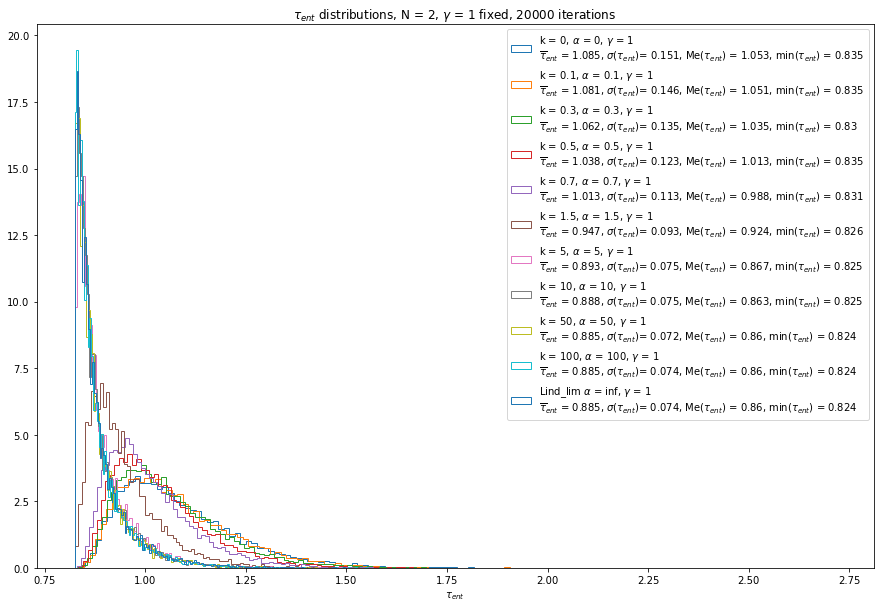

In [10]:
''' In this program the rescaled histograms are plotted for fixed 'a' and 'g' and different values
    of k. Next, the histograms for k = 0.1, a = 1, g = 10 are compared for increasing sample sizes
    in order to see if there are some oscillations in the distribution for small Hamiltonians.'''
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from lindblad import *

# Parameters:
N = 2
iterations = 20000
alpha, gamma = 1, 1
median_ref = 1

fixed_list = ['g']
fixed_val = 1
k_list_alpha = [0.1,0.3,0.5,0.7,1,1.5,2]#,3,5,7,10]
k_list_gamma = [0,0.1,0.3,0.5,0.7,1.5,5,10,50,100]#,250,500,1000]

common_path = "C:\\Users\\cerra\\Documents\\GitHub\\lindblad_data"

# Histograms for fixed 'a' or 'g'
if True:
    # k_list_gamma = [5,10,50,100,250,500,1000]
    for fixed in fixed_list:
        if fixed == 'a':
            greek_fixed = r'$\alpha$'
            k_list = k_list_alpha
        if fixed == 'g':
            greek_fixed = r'$\gamma$'
            k_list = k_list_gamma
        
        fig_hist, ax_hist = plt.subplots(figsize=(15,10))
        ax_hist.set_title(fr'$\tau_{{ent}}$ distributions, '\
                          fr'N = {N}, {greek_fixed} = {fixed_val} fixed, {iterations} iterations')

        for k_value in k_list:
            if fixed == 'a':
                if k_value == 0:
                    print('k CANNOT BE EQUAL TO 0 IF ALPHA IS FIXED.')
                    break
                else:
                    alpha = fixed_val
                    gamma = alpha/k_value
            if fixed == 'g':
                gamma = fixed_val
                alpha = gamma*k_value
            
            # Create a DataFrame from the excel file where all the data are saved
            df_fromexcel = pd.read_excel(f'{common_path}\\{fixed}_fixed_comparable_data\\{fixed}={fixed_val}\\'\
            f'Lindblad_eigvals_t_ent_{fixed}_fixed_k_{k_value}_{iterations}_iterations_N_{N}.xlsx')
            
            # Access to the column 't_ent' and drop NaN values if present
            t_ent_values = df_fromexcel['t_ent'].dropna().values
            # Ccompute mean, standard deviation and median of t_ent values
            mean_t_ent = np.round(np.mean(t_ent_values),3)
            std_t_ent = np.round(np.std(t_ent_values),3)
            median_t_ent = np.round(np.median(t_ent_values),3)
            min_t_ent = np.round(min(t_ent_values),3)

            
            # Compute the histogram of t_ent values
            ax_hist.hist(t_ent_values, bins = 'auto', histtype='step', fill = False,\
                    density = True, label = fr'k = {k_value}, $\alpha$ = {np.round(alpha,2)}, '\
                    fr'$\gamma$ = {np.round(gamma,2)}'+ '\n' + \
                    fr'$\overline{{ \tau}}_{{ent}}$ = {mean_t_ent}, $\sigma(\tau_{{ent}})$'\
                    fr'= {std_t_ent}, Me($\tau_{{ent}}$) = {median_t_ent}, '\
                    fr'min($\tau_{{ent}}$) = {min_t_ent}')
            ax_hist.set_xlabel(\
                            fr'$\tau_{{ent}}$')
        
        df_fromexcel_lim = pd.read_excel(f'{common_path}\\a_fixed_comparable_data\\'\
                                     f'Lindblad_eigvals_t_ent_a_fixed_k_lim_20000_iterations_N_2.xlsx')

        # Access to the column 't_ent' and drop NaN values if present
        t_ent_values_lim = df_fromexcel_lim['t_ent'].dropna().values
        mean_t_ent = np.round(np.mean(t_ent_values_lim),3)
        std_t_ent = np.round(np.std(t_ent_values_lim),3)
        median_t_ent = np.round(np.median(t_ent_values_lim),3)
        min_t_ent = np.round(min(t_ent_values_lim),3)
        ax_hist.hist(t_ent_values_lim, bins = 'auto', histtype='step', fill = False,\
                    density = True, label = fr'Lind_lim $\alpha$ = inf, '\
                    fr'$\gamma$ = 1'+ '\n' + \
                    fr'$\overline{{ \tau}}_{{ent}}$ = {mean_t_ent}, $\sigma(\tau_{{ent}})$'\
                    fr'= {std_t_ent}, Me($\tau_{{ent}}$) = {median_t_ent}, '\
                    fr'min($\tau_{{ent}}$) = {min_t_ent}')
        ax_hist.legend()
    # plt.show()
    plt.savefig(f'C:\\Users\\cerra\\Desktop\\Problems_LL\\t_ent_distrib_with_lind_lim')



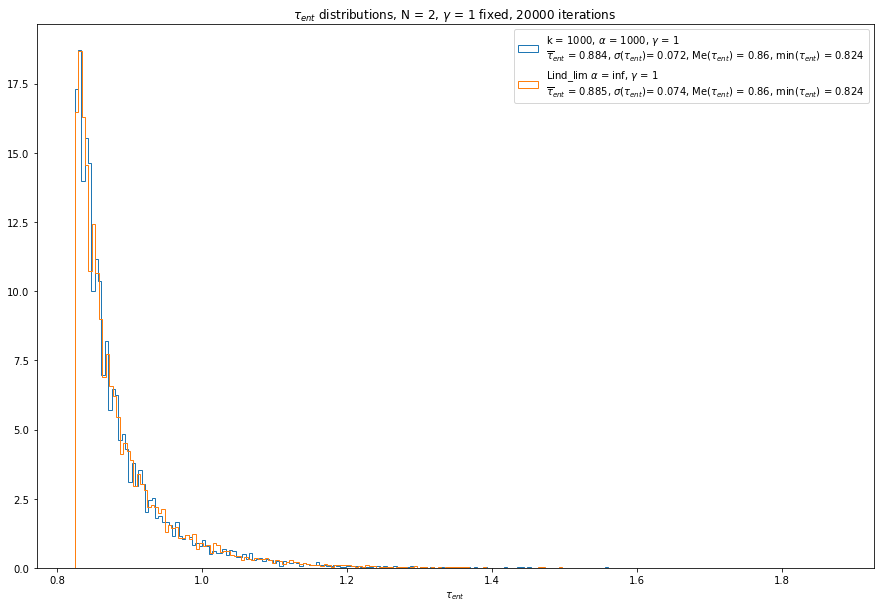

In [9]:
''' In this program the rescaled histograms are plotted for fixed 'a' and 'g' and different values
    of k. Next, the histograms for k = 0.1, a = 1, g = 10 are compared for increasing sample sizes
    in order to see if there are some oscillations in the distribution for small Hamiltonians.'''
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from lindblad import *

# Parameters:
N = 2
iterations = 20000
alpha, gamma = 1, 1
median_ref = 1

fixed_list = ['g']
fixed_val = 1
k_list_alpha = [0.1,0.3,0.5,0.7,1,1.5,2]#,3,5,7,10]
k_list_gamma = [1000]

common_path = "C:\\Users\\cerra\\Documents\\GitHub\\lindblad_data"

# Histograms for fixed 'a' or 'g'
if True:
    # k_list_gamma = [5,10,50,100,250,500,1000]
    for fixed in fixed_list:
        if fixed == 'a':
            greek_fixed = r'$\alpha$'
            k_list = k_list_alpha
        if fixed == 'g':
            greek_fixed = r'$\gamma$'
            k_list = k_list_gamma
        
        fig_hist, ax_hist = plt.subplots(figsize=(15,10))
        ax_hist.set_title(fr'$\tau_{{ent}}$ distributions, '\
                          fr'N = {N}, {greek_fixed} = {fixed_val} fixed, {iterations} iterations')

        for k_value in k_list:
            if fixed == 'a':
                if k_value == 0:
                    print('k CANNOT BE EQUAL TO 0 IF ALPHA IS FIXED.')
                    break
                else:
                    alpha = fixed_val
                    gamma = alpha/k_value
            if fixed == 'g':
                gamma = fixed_val
                alpha = gamma*k_value
            
            # Create a DataFrame from the excel file where all the data are saved
            df_fromexcel = pd.read_excel(f'{common_path}\\{fixed}_fixed_comparable_data\\{fixed}={fixed_val}\\'\
            f'Lindblad_eigvals_t_ent_{fixed}_fixed_k_{k_value}_{iterations}_iterations_N_{N}.xlsx')
            
            # Access to the column 't_ent' and drop NaN values if present
            t_ent_values = df_fromexcel['t_ent'].dropna().values
            # Ccompute mean, standard deviation and median of t_ent values
            mean_t_ent = np.round(np.mean(t_ent_values),3)
            std_t_ent = np.round(np.std(t_ent_values),3)
            median_t_ent = np.round(np.median(t_ent_values),3)
            min_t_ent = np.round(min(t_ent_values),3)

            
            # Compute the histogram of t_ent values
            ax_hist.hist(t_ent_values, bins = 'auto', histtype='step', fill = False,\
                    density = True, label = fr'k = {k_value}, $\alpha$ = {np.round(alpha,2)}, '\
                    fr'$\gamma$ = {np.round(gamma,2)}'+ '\n' + \
                    fr'$\overline{{ \tau}}_{{ent}}$ = {mean_t_ent}, $\sigma(\tau_{{ent}})$'\
                    fr'= {std_t_ent}, Me($\tau_{{ent}}$) = {median_t_ent}, '\
                    fr'min($\tau_{{ent}}$) = {min_t_ent}')
            ax_hist.set_xlabel(\
                            fr'$\tau_{{ent}}$')
        
        df_fromexcel_lim = pd.read_excel(f'{common_path}\\a_fixed_comparable_data\\'\
                                     f'Lindblad_eigvals_t_ent_a_fixed_k_lim_20000_iterations_N_2.xlsx')

        # Access to the column 't_ent' and drop NaN values if present
        t_ent_values_lim = df_fromexcel_lim['t_ent'].dropna().values
        mean_t_ent = np.round(np.mean(t_ent_values_lim),3)
        std_t_ent = np.round(np.std(t_ent_values_lim),3)
        median_t_ent = np.round(np.median(t_ent_values_lim),3)
        min_t_ent = np.round(min(t_ent_values_lim),3)
        ax_hist.hist(t_ent_values_lim, bins = 'auto', histtype='step', fill = False,\
                    density = True, label = fr'Lind_lim $\alpha$ = inf, '\
                    fr'$\gamma$ = 1'+ '\n' + \
                    fr'$\overline{{ \tau}}_{{ent}}$ = {mean_t_ent}, $\sigma(\tau_{{ent}})$'\
                    fr'= {std_t_ent}, Me($\tau_{{ent}}$) = {median_t_ent}, '\
                    fr'min($\tau_{{ent}}$) = {min_t_ent}')
        ax_hist.legend()
    # plt.show()
    plt.savefig(f'C:\\Users\\cerra\\Desktop\\Problems_LL\\t_ent_distrib_with_lind_lim_restricted')

